In [1]:
import numpy as np
import pandas as pd

In [2]:
all_data_chemical_space =pd.read_csv("all_data_chemical_space_new.csv")

In [3]:
all_data_chemical_space

,StdInChI,Activity,Data,CP_Correct?,GO_Correct?,Morgan_Correct?,Early_Fusion_CP_GO_Model_Correct?,Early_Fusion_Morgan_CP_Correct?,Early_Fusion_CP_GO_Morgan_Correct?,Late_Stage_Fusion_CP_GO_Morgan_Correct?,...,Nuclei_Neighbors_AngleBetweenNeighbors_1,Nuclei_RadialDistribution_FracAtD_DNA_3of4,Nuclei_RadialDistribution_FracAtD_Mito_1of4,Nuclei_RadialDistribution_FracAtD_Mito_2of4,Nuclei_RadialDistribution_RadialCV_RNA_4of4,Nuclei_Texture_Variance_AGP_5_0,Nuclei_Texture_Variance_Mito_10_0,smiles_r,Common_name,iupac_name
0,InChI=1S/C10H10N2O/c1-8-7-10(13)12(11-8)9-5-3-...,1.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.436513,-0.000706,-0.000059,-0.000301,0.004119,-0.051510,-0.037841,CC1=NN(c2ccccc2)C(=O)C1,edaravone,5-methyl-2-phenyl-4H-pyrazol-3-one
1,"InChI=1S/C10H10N4O2S/c11-8-2-4-9(5-3-8)17(15,1...",0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.075252,-0.001943,0.000136,0.000216,-0.003718,-0.034367,0.018558,Nc1ccc(S(=O)(=O)Nc2ncccn2)cc1,sulfadiazine,4-amino-N-pyrimidin-2-ylbenzenesulfonamide
2,"InChI=1S/C10H11ClO3/c1-10(2,9(12)13)14-8-5-3-7...",0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.670106,-0.000870,-0.001226,-0.002602,-0.002529,-0.038324,-0.138879,CC(C)(Oc1ccc(Cl)cc1)C(=O)O,clofibric acid,2-(4-chlorophenoxy)-2-methylpropanoic acid
3,InChI=1S/C10H11N3O3S/c1-7-6-10(12-16-7)13-17(1...,0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.188393,-0.000017,-0.001072,-0.001390,-0.007933,0.018512,-0.018229,Cc1cc(NS(=O)(=O)c2ccc(N)cc2)no1,sulfamethoxazole,"4-amino-N-(5-methyl-1,2-oxazol-3-yl)benzenesul..."
4,InChI=1S/C10H12ClNO2/c11-9-3-1-7(2-4-9)8(6-12)...,0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.318317,0.000882,-0.000066,0.000191,0.009272,-0.127468,-0.076766,NCC(CC(=O)O)c1ccc(Cl)cc1,baclofen,4-amino-3-(4-chlorophenyl)butanoic acid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,InChI=1S/C19H24N2/c1-20(2)14-7-15-21-18-10-5-3...,1.0,ExtTest,True,False,False,False,True,True,False,...,-5.047263,0.002368,0.000464,0.000591,-0.006627,0.007799,-0.017696,CN(C)CCCN1c2ccccc2CCc2ccccc21,imipramine,"3-(5,6-dihydrobenzo[b][1]benzazepin-11-yl)-N,N..."
622,InChI=1S/C20H23N/c1-21-14-6-12-20-13-11-15(16-...,1.0,ExtTest,True,True,False,True,False,True,True,...,-3.686144,-0.000953,-0.001322,-0.003399,-0.001089,-0.049935,-0.148208,CNCCCC12CCC(c3ccccc31)c1ccccc12,maprotiline,"N-methyl-3-(1-tetracyclo[6.6.2.02,7.09,14]hexa..."
623,InChI=1S/C24H34N4O5S/c1-4-21-17(3)15-28(22(21)...,1.0,ExtTest,False,False,False,False,False,True,False,...,-1.026951,-0.000543,-0.000008,0.000167,-0.002885,0.066087,-0.032643,CCC1=C(C)CN(C(O)=NCCc2ccc(S(=O)(=O)NC(O)=NC3CC...,glimepiride,4-ethyl-3-methyl-N-[2-[4-[(4-methylcyclohexyl)...
624,InChI=1S/C25H31F3O5S/c1-5-20(31)33-25(21(32)34...,1.0,ExtTest,True,False,True,True,True,True,True,...,-2.482721,0.000050,-0.001073,-0.002447,-0.013513,-0.030397,-0.064926,CCC(=O)O[C@]1(C(=O)SCF)[C@H](C)C[C@H]2[C@@H]3C...,FLUTICASONE PROPIONATE,"[(6S,8S,9R,10S,11S,13S,14S,16R,17R)-6,9-difluo..."


In [4]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import inchi
from rdkit import Chem


def fp_as_DataStructs(mol):
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    #arr = np.zeros((1,), np.int)
    #DataStructs.ConvertToNumpyArray(fp, arr)
    return fp

mol_list = [Chem.MolFromSmiles(x) for x in all_data_chemical_space.smiles_r]
all_data_chemical_space['Mol'] = mol_list
all_data_chemical_space['fp'] = [fp_as_DataStructs(x) for x in all_data_chemical_space.Mol]
all_data_chemical_space

,StdInChI,Activity,Data,CP_Correct?,GO_Correct?,Morgan_Correct?,Early_Fusion_CP_GO_Model_Correct?,Early_Fusion_Morgan_CP_Correct?,Early_Fusion_CP_GO_Morgan_Correct?,Late_Stage_Fusion_CP_GO_Morgan_Correct?,...,Nuclei_RadialDistribution_FracAtD_Mito_1of4,Nuclei_RadialDistribution_FracAtD_Mito_2of4,Nuclei_RadialDistribution_RadialCV_RNA_4of4,Nuclei_Texture_Variance_AGP_5_0,Nuclei_Texture_Variance_Mito_10_0,smiles_r,Common_name,iupac_name,Mol,fp
0,InChI=1S/C10H10N2O/c1-8-7-10(13)12(11-8)9-5-3-...,1.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000059,-0.000301,0.004119,-0.051510,-0.037841,CC1=NN(c2ccccc2)C(=O)C1,edaravone,5-methyl-2-phenyl-4H-pyrazol-3-one,<rdkit.Chem.rdchem.Mol object at 0x7ff55da0a640>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"InChI=1S/C10H10N4O2S/c11-8-2-4-9(5-3-8)17(15,1...",0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000136,0.000216,-0.003718,-0.034367,0.018558,Nc1ccc(S(=O)(=O)Nc2ncccn2)cc1,sulfadiazine,4-amino-N-pyrimidin-2-ylbenzenesulfonamide,<rdkit.Chem.rdchem.Mol object at 0x7ff55da0a6a0>,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"InChI=1S/C10H11ClO3/c1-10(2,9(12)13)14-8-5-3-7...",0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.001226,-0.002602,-0.002529,-0.038324,-0.138879,CC(C)(Oc1ccc(Cl)cc1)C(=O)O,clofibric acid,2-(4-chlorophenoxy)-2-methylpropanoic acid,<rdkit.Chem.rdchem.Mol object at 0x7ff55da0a700>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,InChI=1S/C10H11N3O3S/c1-7-6-10(12-16-7)13-17(1...,0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.001072,-0.001390,-0.007933,0.018512,-0.018229,Cc1cc(NS(=O)(=O)c2ccc(N)cc2)no1,sulfamethoxazole,"4-amino-N-(5-methyl-1,2-oxazol-3-yl)benzenesul...",<rdkit.Chem.rdchem.Mol object at 0x7ff55da0a760>,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,InChI=1S/C10H12ClNO2/c11-9-3-1-7(2-4-9)8(6-12)...,0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000066,0.000191,0.009272,-0.127468,-0.076766,NCC(CC(=O)O)c1ccc(Cl)cc1,baclofen,4-amino-3-(4-chlorophenyl)butanoic acid,<rdkit.Chem.rdchem.Mol object at 0x7ff55da0a7c0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,InChI=1S/C19H24N2/c1-20(2)14-7-15-21-18-10-5-3...,1.0,ExtTest,True,False,False,False,True,True,False,...,0.000464,0.000591,-0.006627,0.007799,-0.017696,CN(C)CCCN1c2ccccc2CCc2ccccc21,imipramine,"3-(5,6-dihydrobenzo[b][1]benzazepin-11-yl)-N,N...",<rdkit.Chem.rdchem.Mol object at 0x7ff55da1e2e0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
622,InChI=1S/C20H23N/c1-21-14-6-12-20-13-11-15(16-...,1.0,ExtTest,True,True,False,True,False,True,True,...,-0.001322,-0.003399,-0.001089,-0.049935,-0.148208,CNCCCC12CCC(c3ccccc31)c1ccccc12,maprotiline,"N-methyl-3-(1-tetracyclo[6.6.2.02,7.09,14]hexa...",<rdkit.Chem.rdchem.Mol object at 0x7ff55da1e340>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
623,InChI=1S/C24H34N4O5S/c1-4-21-17(3)15-28(22(21)...,1.0,ExtTest,False,False,False,False,False,True,False,...,-0.000008,0.000167,-0.002885,0.066087,-0.032643,CCC1=C(C)CN(C(O)=NCCc2ccc(S(=O)(=O)NC(O)=NC3CC...,glimepiride,4-ethyl-3-methyl-N-[2-[4-[(4-methylcyclohexyl)...,<rdkit.Chem.rdchem.Mol object at 0x7ff55da1e3a0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
624,InChI=1S/C25H31F3O5S/c1-5-20(31)33-25(21(32)34...,1.0,ExtTest,True,False,True,True,True,True,True,...,-0.001073,-0.002447,-0.013513,-0.030397,-0.064926,CCC(=O)O[C@]1(C(=O)SCF)[C@H](C)C[C@H]2[C@@H]3C...,FLUTICASONE PROPIONATE,"[(6S,8S,9R,10S,11S,13S,14S,16R,17R)-6,9-difluo...",<rdkit.Chem.rdchem.Mol object at 0x7ff55da1e400>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [5]:
train=all_data_chemical_space[all_data_chemical_space["Data"]=="CrossVal"]
train

,StdInChI,Activity,Data,CP_Correct?,GO_Correct?,Morgan_Correct?,Early_Fusion_CP_GO_Model_Correct?,Early_Fusion_Morgan_CP_Correct?,Early_Fusion_CP_GO_Morgan_Correct?,Late_Stage_Fusion_CP_GO_Morgan_Correct?,...,Nuclei_RadialDistribution_FracAtD_Mito_1of4,Nuclei_RadialDistribution_FracAtD_Mito_2of4,Nuclei_RadialDistribution_RadialCV_RNA_4of4,Nuclei_Texture_Variance_AGP_5_0,Nuclei_Texture_Variance_Mito_10_0,smiles_r,Common_name,iupac_name,Mol,fp
0,InChI=1S/C10H10N2O/c1-8-7-10(13)12(11-8)9-5-3-...,1.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000059,-0.000301,0.004119,-0.051510,-0.037841,CC1=NN(c2ccccc2)C(=O)C1,edaravone,5-methyl-2-phenyl-4H-pyrazol-3-one,<rdkit.Chem.rdchem.Mol object at 0x7ff55da0a640>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"InChI=1S/C10H10N4O2S/c11-8-2-4-9(5-3-8)17(15,1...",0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000136,0.000216,-0.003718,-0.034367,0.018558,Nc1ccc(S(=O)(=O)Nc2ncccn2)cc1,sulfadiazine,4-amino-N-pyrimidin-2-ylbenzenesulfonamide,<rdkit.Chem.rdchem.Mol object at 0x7ff55da0a6a0>,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"InChI=1S/C10H11ClO3/c1-10(2,9(12)13)14-8-5-3-7...",0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.001226,-0.002602,-0.002529,-0.038324,-0.138879,CC(C)(Oc1ccc(Cl)cc1)C(=O)O,clofibric acid,2-(4-chlorophenoxy)-2-methylpropanoic acid,<rdkit.Chem.rdchem.Mol object at 0x7ff55da0a700>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,InChI=1S/C10H11N3O3S/c1-7-6-10(12-16-7)13-17(1...,0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.001072,-0.001390,-0.007933,0.018512,-0.018229,Cc1cc(NS(=O)(=O)c2ccc(N)cc2)no1,sulfamethoxazole,"4-amino-N-(5-methyl-1,2-oxazol-3-yl)benzenesul...",<rdkit.Chem.rdchem.Mol object at 0x7ff55da0a760>,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,InChI=1S/C10H12ClNO2/c11-9-3-1-7(2-4-9)8(6-12)...,0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000066,0.000191,0.009272,-0.127468,-0.076766,NCC(CC(=O)O)c1ccc(Cl)cc1,baclofen,4-amino-3-(4-chlorophenyl)butanoic acid,<rdkit.Chem.rdchem.Mol object at 0x7ff55da0a7c0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,InChI=1S/C9H15NO3S/c1-6(5-14)8(11)10-4-2-3-7(1...,0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000604,-0.000899,0.000146,-0.043623,-0.018230,C[C@H](CS)C(=O)N1CCC[C@H]1C(=O)O,captopril,(2S)-1-[(2S)-2-methyl-3-sulfanylpropanoyl]pyrr...,<rdkit.Chem.rdchem.Mol object at 0x7ff55da185e0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
378,InChI=1S/C9H18N6/c1-13(2)7-10-8(14(3)4)12-9(11...,0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000505,-0.000682,-0.003057,-0.011223,-0.010557,CN(C)c1nc(N(C)C)nc(N(C)C)n1,altretamine,"2-N,2-N,4-N,4-N,6-N,6-N-hexamethyl-1,3,5-triaz...",<rdkit.Chem.rdchem.Mol object at 0x7ff55da18640>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
379,InChI=1S/C9H6O2/c10-9-6-5-7-3-1-2-4-8(7)11-9/h...,0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000142,-0.000150,0.002149,-0.034503,-0.033169,O=c1ccc2ccccc2o1,coumarin,chromen-2-one,<rdkit.Chem.rdchem.Mol object at 0x7ff55da186a0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
380,"InChI=1S/C9H9N3O2S2/c10-7-1-3-8(4-2-7)16(13,14...",0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000427,-0.001390,-0.003652,-0.042597,-0.088286,Nc1ccc(S(=O)(=O)Nc2nccs2)cc1,sulfathiazole,"4-amino-N-(1,3-thiazol-2-yl)benzenesulfonamide",<rdkit.Chem.rdchem.Mol object at 0x7ff55da18700>,"[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


In [6]:
test=all_data_chemical_space[all_data_chemical_space["Data"]=="ExtTest"]
test = test.reset_index(drop=True)
test

,StdInChI,Activity,Data,CP_Correct?,GO_Correct?,Morgan_Correct?,Early_Fusion_CP_GO_Model_Correct?,Early_Fusion_Morgan_CP_Correct?,Early_Fusion_CP_GO_Morgan_Correct?,Late_Stage_Fusion_CP_GO_Morgan_Correct?,...,Nuclei_RadialDistribution_FracAtD_Mito_1of4,Nuclei_RadialDistribution_FracAtD_Mito_2of4,Nuclei_RadialDistribution_RadialCV_RNA_4of4,Nuclei_Texture_Variance_AGP_5_0,Nuclei_Texture_Variance_Mito_10_0,smiles_r,Common_name,iupac_name,Mol,fp
0,"InChI=1S/C18H29N3O5/c1-18(2,3)19-11-15(22)12-8...",0.0,ExtTest,True,True,True,True,True,True,True,...,-0.000849,-0.001937,-0.004796,-0.106988,-0.056603,CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1,Bambuterol,[3-[2-(tert-butylamino)-1-hydroxyethyl]-5-(dim...,<rdkit.Chem.rdchem.Mol object at 0x7ff55da187c0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,InChI=1S/C16H21NO2/c1-12(2)17-10-14(18)11-19-1...,0.0,ExtTest,True,False,True,False,True,False,False,...,-0.000559,-0.001262,-0.003697,-0.086758,-0.000757,CC(C)NCC(O)COc1cccc2ccccc12,propranolol,1-naphthalen-1-yloxy-3-(propan-2-ylamino)propa...,<rdkit.Chem.rdchem.Mol object at 0x7ff55da18820>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,InChI=1S/C9H7Cl2N5/c10-4-1-2-6(11)5(3-4)7-14-8...,0.0,ExtTest,True,True,True,True,True,True,True,...,0.000192,-0.001409,-0.005758,-0.007059,0.013777,N=c1nc(-c2cc(Cl)ccc2Cl)[nH]c(=N)[nH]1,Irsogladine,"6-(2,5-dichlorophenyl)-1,3,5-triazine-2,4-diamine",<rdkit.Chem.rdchem.Mol object at 0x7ff55da18880>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"InChI=1S/C34H54O8/c1-9-25(31-21(6)18-34(11-3,4...",1.0,ExtTest,True,True,False,True,True,True,True,...,0.001966,0.004943,0.004650,-0.080322,-0.057559,CC[C@@H](C(=O)[C@@H](C)[C@@H](O)[C@H](C)CCc1cc...,lasalocid,"6-[(3R,4S,5S,7R)-7-[(2S,3S,5S)-5-ethyl-5-[(2R,...",<rdkit.Chem.rdchem.Mol object at 0x7ff55da188e0>,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,InChI=1S/C20H21ClN2O4/c21-16-2-4-17(5-3-16)25-...,0.0,ExtTest,False,True,True,True,True,True,False,...,0.000032,-0.000186,0.002787,-0.116174,-0.080637,O=C(COc1ccc(Cl)cc1)N1CCN(Cc2ccc3c(c2)OCO3)CC1,fipexide,"1-[4-(1,3-benzodioxol-5-ylmethyl)piperazin-1-y...",<rdkit.Chem.rdchem.Mol object at 0x7ff55da18940>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,InChI=1S/C19H24N2/c1-20(2)14-7-15-21-18-10-5-3...,1.0,ExtTest,True,False,False,False,True,True,False,...,0.000464,0.000591,-0.006627,0.007799,-0.017696,CN(C)CCCN1c2ccccc2CCc2ccccc21,imipramine,"3-(5,6-dihydrobenzo[b][1]benzazepin-11-yl)-N,N...",<rdkit.Chem.rdchem.Mol object at 0x7ff55da1e2e0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
240,InChI=1S/C20H23N/c1-21-14-6-12-20-13-11-15(16-...,1.0,ExtTest,True,True,False,True,False,True,True,...,-0.001322,-0.003399,-0.001089,-0.049935,-0.148208,CNCCCC12CCC(c3ccccc31)c1ccccc12,maprotiline,"N-methyl-3-(1-tetracyclo[6.6.2.02,7.09,14]hexa...",<rdkit.Chem.rdchem.Mol object at 0x7ff55da1e340>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
241,InChI=1S/C24H34N4O5S/c1-4-21-17(3)15-28(22(21)...,1.0,ExtTest,False,False,False,False,False,True,False,...,-0.000008,0.000167,-0.002885,0.066087,-0.032643,CCC1=C(C)CN(C(O)=NCCc2ccc(S(=O)(=O)NC(O)=NC3CC...,glimepiride,4-ethyl-3-methyl-N-[2-[4-[(4-methylcyclohexyl)...,<rdkit.Chem.rdchem.Mol object at 0x7ff55da1e3a0>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
242,InChI=1S/C25H31F3O5S/c1-5-20(31)33-25(21(32)34...,1.0,ExtTest,True,False,True,True,True,True,True,...,-0.001073,-0.002447,-0.013513,-0.030397,-0.064926,CCC(=O)O[C@]1(C(=O)SCF)[C@H](C)C[C@H]2[C@@H]3C...,FLUTICASONE PROPIONATE,"[(6S,8S,9R,10S,11S,13S,14S,16R,17R)-6,9-difluo...",<rdkit.Chem.rdchem.Mol object at 0x7ff55da1e400>,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [7]:
#Find similarity between each test compounds and train set compounds of same class and 
#store the lowest tanimoto similarity of MFP keys
neighbours_limit = 5
def findsimscore(train, test): 
    td_nearest_list = []
    inchi_test_list = []
    
    for index, row in test.iterrows():

        inchi_test = row["StdInChI"]
        #print(inchi_test)
        fps_test = row["fp"]

        compound_activity= row["Activity"]
        #print(compound_activity)
        temp_train = pd.DataFrame()
        temp_train= train[train["Activity"] == compound_activity]
        #print(temp.shape)

        fps_temp_train=[(x) for x in temp_train["fp"]]
        td_nearest = []
        #mean of n nearest points
        td_nearest= np.sort(DataStructs.BulkTanimotoSimilarity(fps_test ,fps_temp_train, returnDistance=1))[:neighbours_limit]#.median()
        td_nearest = np.median(td_nearest)
        td_nearest_list.append(td_nearest)
        inchi_test_list.append(inchi_test)
        
    td_nearest_list=np.array(td_nearest_list)
    #print(td_nearest_list)
    td_nearest_list= td_nearest_list.reshape(len(test))

    df_td_nearest = pd.DataFrame({ "StdInChI": inchi_test_list, "td_nearest": td_nearest_list})
    return df_td_nearest

In [8]:
df_ts_highest = findsimscore(train, test)

In [9]:
df_ts_highest = df_ts_highest.sort_values("td_nearest")
df_ts_highest

,StdInChI,td_nearest
39,InChI=1S/C15H25NO3/c1-12(2)16-10-14(17)11-19-1...,0.434783
179,InChI=1S/C26H26N2O3/c29-19-8-7-15-11-20-26(30)...,0.518987
59,InChI=1S/C11H17NO3/c1-7(2)12-6-11(15)8-3-9(13)...,0.538462
1,InChI=1S/C16H21NO2/c1-12(2)17-10-14(18)11-19-1...,0.551020
177,InChI=1S/C12H16N6O2S/c1-14-10-7-11(17-12(15-2)...,0.551020
...,...,...
230,"InChI=1S/C18H24N2OS/c1-17(2,3)13-8-11(7-12(10-...",0.859649
189,"InChI=1S/C19H21N3O3S/c1-22(2)26(24,25)14-7-8-1...",0.862500
3,"InChI=1S/C34H54O8/c1-9-25(31-21(6)18-34(11-3,4...",0.864583
238,InChI=1S/C16H15N5O7S2/c1-2-6-4-29-14-10(13(25)...,0.888889


In [10]:
select_list = [
    "StdInChI",
    "Activity",                           
 'Cells_Granularity_10_RNA',
 'Cytoplasm_AreaShape_FormFactor',
 'Cytoplasm_Correlation_K_Mito_RNA',
 'Nuclei_AreaShape_Zernike_7_1',
 'Cytoplasm_Granularity_1_RNA',
 'Nuclei_AreaShape_Zernike_7_3',
 'Nuclei_Correlation_Costes_DNA_AGP',
 'Cells_Granularity_1_RNA',
 'Cells_Granularity_1_AGP',
 'Nuclei_Intensity_LowerQuartileIntensity_ER',
 'Cells_Granularity_14_RNA',
 'Cytoplasm_Correlation_K_DNA_ER',
 'Cells_Intensity_MedianIntensity_ER',
 'Nuclei_Intensity_IntegratedIntensityEdge_RNA',
 'Cells_Intensity_StdIntensityEdge_RNA',
 'Cytoplasm_Intensity_IntegratedIntensityEdge_ER',
 'Cytoplasm_Correlation_RWC_RNA_Mito',
 'Cells_Correlation_RWC_Mito_RNA',
 'Nuclei_AreaShape_Zernike_5_1',
 'Nuclei_Granularity_1_ER',
 'Cytoplasm_RadialDistribution_MeanFrac_RNA_4of4',
 'Nuclei_RadialDistribution_RadialCV_RNA_4of4',
 'Cells_Intensity_IntegratedIntensityEdge_AGP',
 'Cytoplasm_AreaShape_Zernike_6_6',
 'Cytoplasm_Granularity_8_Mito',
 'Nuclei_Correlation_Correlation_Mito_ER',
 'Nuclei_Intensity_MassDisplacement_AGP',
 'Cytoplasm_Granularity_14_RNA',
 'Nuclei_RadialDistribution_FracAtD_DNA_3of4',
 'Cells_Correlation_RWC_AGP_DNA',
 'Cells_Granularity_12_RNA',
 'Nuclei_Granularity_11_RNA',
 'Cells_Granularity_11_AGP',
 'Nuclei_RadialDistribution_FracAtD_Mito_2of4',
 'Cytoplasm_Granularity_8_ER',
 'Nuclei_Intensity_MaxIntensity_AGP',
 'Cytoplasm_Correlation_RWC_DNA_Mito',
 'Cells_Granularity_8_ER',
 'Nuclei_Granularity_10_RNA',
 'Nuclei_Granularity_1_RNA',
 'Cells_Correlation_RWC_RNA_Mito',
 'Nuclei_Neighbors_AngleBetweenNeighbors_1',
 'Cells_Granularity_1_ER',
 'Cytoplasm_Correlation_RWC_Mito_RNA',
 'Cytoplasm_Correlation_K_DNA_RNA',
 'Nuclei_Granularity_10_ER',
 'Nuclei_Granularity_11_AGP',
 'Cells_Granularity_1_Mito',
 'Nuclei_Granularity_8_ER',
 'Cytoplasm_Granularity_1_ER',
 'Nuclei_Correlation_Costes_ER_AGP',
 'Nuclei_Texture_Variance_AGP_5_0',
 'Cytoplasm_Correlation_Costes_RNA_ER',
 'Cells_RadialDistribution_RadialCV_DNA_4of4',
 'Cytoplasm_Correlation_Costes_DNA_Mito',
 'Cytoplasm_Correlation_K_DNA_AGP',
 'Cells_Correlation_K_DNA_ER',
 'Cells_Granularity_10_ER',
 'Cells_Granularity_8_RNA',
 'Nuclei_Granularity_8_RNA',
 'Cytoplasm_AreaShape_Zernike_8_0',
 'Cytoplasm_Granularity_11_RNA',
 'Cells_Texture_DifferenceVariance_RNA_10_0',
 'Cytoplasm_Granularity_10_ER',
 'Cells_Granularity_11_RNA',
 'Cytoplasm_RadialDistribution_MeanFrac_RNA_2of4',
 'Cells_Granularity_12_AGP',
 'Cytoplasm_Granularity_1_AGP',
 'Cytoplasm_AreaShape_Zernike_6_4',
 'Nuclei_Granularity_13_DNA',
 'Nuclei_AreaShape_Zernike_3_3',
 'Cytoplasm_Granularity_1_Mito',
 'Nuclei_Texture_Variance_Mito_10_0',
 'Cytoplasm_Granularity_8_RNA',
 'Cells_AreaShape_Zernike_5_1',
 'Cells_Intensity_MADIntensity_Mito',
 'Nuclei_Correlation_Costes_DNA_RNA',
 'Cells_Correlation_Costes_RNA_ER',
 'Nuclei_Granularity_7_ER',
 'Cytoplasm_Correlation_RWC_Mito_DNA',
 'Nuclei_Intensity_MedianIntensity_DNA',
 'Cytoplasm_Intensity_MedianIntensity_ER',
 'Cells_Correlation_K_AGP_DNA',
 'Cells_RadialDistribution_RadialCV_RNA_4of4',
 'Nuclei_RadialDistribution_FracAtD_Mito_1of4',
 'Nuclei_Intensity_MaxIntensityEdge_AGP',
 'Cells_RadialDistribution_RadialCV_Mito_4of4',
 'Cells_Correlation_RWC_DNA_Mito',
 'Nuclei_Intensity_MedianIntensity_ER',
 'Nuclei_Correlation_K_ER_DNA',
 'Nuclei_Granularity_1_Mito',
 'Cells_Intensity_LowerQuartileIntensity_ER',
 'Nuclei_AreaShape_Zernike_3_1',
 'Cytoplasm_Granularity_16_ER',
 'Cells_Intensity_IntegratedIntensityEdge_ER',
 'Nuclei_Correlation_K_DNA_ER',
 'Nuclei_Granularity_1_AGP',
 'Nuclei_Intensity_UpperQuartileIntensity_ER',
 'Cells_Texture_InfoMeas2_DNA_5_0',
 'Nuclei_Granularity_12_RNA',
 'Nuclei_Granularity_1_DNA',
 'Cytoplasm_Intensity_IntegratedIntensityEdge_RNA',
 'Cytoplasm_Granularity_10_RNA',
 'Cells_Texture_AngularSecondMoment_AGP_10_0',
 'Cytoplasm_Correlation_K_AGP_DNA',
 'Cells_Correlation_Costes_DNA_AGP',
 'Nuclei_AreaShape_Zernike_1_1',
 'Nuclei_Intensity_MinIntensityEdge_ER',
 'Nuclei_Intensity_MinIntensity_ER',
 'Cytoplasm_RadialDistribution_RadialCV_AGP_2of4'
]

In [11]:
train= train[select_list]
test= test[select_list]
from tqdm import tqdm

In [12]:
#CP Correlations
#Active vs Inactive
from scipy import stats 
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import pandas as pd

# make a list of inchi

df_CP_test = test[test.Activity==1].iloc[:, 2:]
df_CP_train = train[train.Activity==1].iloc[:, 2:]

df_smiles_test = test[test.Activity==1]['StdInChI']
df_smiles_train = train[train.Activity==1]['StdInChI']


c_smiles_test = []
for cs in df_smiles_test:
  c_smiles_test.append(cs)
 
print()


c_smiles_train = []
for cs in df_smiles_train:
    c_smiles_train.append(cs)
   
print()
        
# the list for the dataframe
qu, ta, sim = [], [], []
s_p_list=[]
s_s_list=[]
s_log10_p_list=[]
s_log2_effect_list=[]
s_prod_list=[]

for n in tqdm(range(len(df_smiles_test))): 
    for m in range(len(df_smiles_train)):

        qu.append(c_smiles_test[n])
        ta.append(c_smiles_train[m])
        
        pearson= stats.pearsonr(df_CP_test.iloc[n, :].values, df_CP_train.iloc[m, :].values)
        s_log10_p = np.log10(pearson[1])*(-1)
        s_log2_effect = np.log(pearson[0])
        s_prod = s_log10_p * s_log2_effect 
        
        s_p_list.append(pearson[1])
        s_s_list.append(pearson[0])
        s_log10_p_list.append(s_log10_p)
        s_log2_effect_list.append(s_log2_effect)
        s_prod_list.append(s_prod)
        

# build the dataframe and sort it
d = {'query':qu, 'target':ta, 'CP_Pearson_effect': s_s_list, 'CP_Pearson_p_value': s_p_list, 
     'CP_Pearson_log10_p': s_log10_p_list,'CP_Pearson_log2_effect': s_log2_effect_list,'CP_Pearson_prod': s_prod_list}


df_final_ai= pd.DataFrame(data=d)
df_final_ai = df_final_ai.sort_values('CP_Pearson_effect', ascending=False)
df_final_actives=df_final_ai.reset_index()
df_final_actives

  0%|                                                                                   | 0/47 [00:00<?, ?it/s]/tmp/ipykernel_167997/1123583287.py:47: RuntimeWarning: invalid value encountered in log
  s_log2_effect = np.log(pearson[0])
100%|██████████████████████████████████████████████████████████████████████████| 47/47 [00:00<00:00, 51.33it/s]


,index,query,target,CP_Pearson_effect,CP_Pearson_p_value,CP_Pearson_log10_p,CP_Pearson_log2_effect,CP_Pearson_prod
0,2853,"InChI=1S/C25H38O5/c1-6-25(4,5)24(28)30-21-12-1...",InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0.987236,5.229921e-88,87.281505,-0.012846,-1.121234
1,1164,InChI=1S/C17H19ClN2S/c1-19(2)10-5-11-20-14-6-3...,InChI=1S/C23H26FN3O2/c24-19-10-8-18(9-11-19)21...,0.986870,2.387238e-87,86.622104,-0.013217,-1.144910
2,1124,InChI=1S/C17H19ClN2S/c1-19(2)10-5-11-20-14-6-3...,InChI=1S/C12H6Cl4O2S/c13-5-1-7(15)11(17)9(3-5)...,0.985182,1.564685e-84,83.805573,-0.014929,-1.251123
3,1412,InChI=1S/C15H12O4/c16-11-4-1-10(2-5-11)3-8-14(...,InChI=1S/C23H26FN3O2/c24-19-10-8-18(9-11-19)21...,0.984470,1.937962e-83,82.712655,-0.015652,-1.294628
4,1117,InChI=1S/C17H19ClN2S/c1-19(2)10-5-11-20-14-6-3...,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0.982391,1.622625e-80,79.789782,-0.017766,-1.417568
...,...,...,...,...,...,...,...,...
2909,2588,InChI=1S/C16H15N5O7S2/c1-2-6-4-29-14-10(13(25)...,InChI=1S/C22H26FN3O2/c23-18-7-9-20(10-8-18)28-...,-0.973793,2.732322e-71,70.563468,NaN,NaN
2910,72,InChI=1S/C15H15NO2/c1-10-6-5-9-13(11(10)2)16-1...,"InChI=1S/C13H12N2O5S/c1-21(18,19)14-12-8-7-10(...",-0.974889,2.797633e-72,71.553209,NaN,NaN
2911,1310,InChI=1S/C16H11NO5/c17-8-11(5-9-1-3-12(18)14(2...,InChI=1S/C12H6Cl4O2S/c13-5-1-7(15)11(17)9(3-5)...,-0.978025,2.261900e-75,74.645527,NaN,NaN
2912,2576,InChI=1S/C16H15N5O7S2/c1-2-6-4-29-14-10(13(25)...,InChI=1S/C18H24O2/c1-18-9-8-14-13-5-3-12(19)10...,-0.980333,6.003990e-78,77.221560,NaN,NaN


In [13]:
#CP Fingerprint Correlations
#Inactive vs Inactive
from scipy import stats 
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
import pandas as pd

# make a list of inchi

df_CP_test = test[test.Activity==0].iloc[:, 2:]
df_CP_train = train[train.Activity==0].iloc[:, 2:]

df_smiles_test = test[test.Activity==0]['StdInChI']
df_smiles_train = train[train.Activity==0]['StdInChI']


c_smiles_test = []
for cs in df_smiles_test:
  c_smiles_test.append(cs)
 
print()


c_smiles_train = []
for cs in df_smiles_train:
    c_smiles_train.append(cs)
   
print()
        
# the list for the dataframe
qu, ta, sim = [], [], []
s_p_list=[]
s_s_list=[]
s_log10_p_list=[]
s_log2_effect_list=[]
s_prod_list=[]

for n in tqdm(range(len(df_smiles_test))): 
    for m in range(len(df_smiles_train)):

        qu.append(c_smiles_test[n])
        ta.append(c_smiles_train[m])
        
        pearson= stats.pearsonr(df_CP_test.iloc[n, :].values, df_CP_train.iloc[m, :].values)
        s_log10_p = np.log10(pearson[1])*(-1)
        s_log2_effect = np.log(pearson[0])
        s_prod = s_log10_p * s_log2_effect 
        
        s_p_list.append(pearson[1])
        s_s_list.append(pearson[0])
        s_log10_p_list.append(s_log10_p)
        s_log2_effect_list.append(s_log2_effect)
        s_prod_list.append(s_prod)
        

# build the dataframe and sort it
d = {'query':qu, 'target':ta, 'CP_Pearson_effect': s_s_list, 'CP_Pearson_p_value': s_p_list, 
     'CP_Pearson_log10_p': s_log10_p_list,'CP_Pearson_log2_effect': s_log2_effect_list,'CP_Pearson_prod': s_prod_list}


df_final_ai= pd.DataFrame(data=d)
df_final_ai = df_final_ai.sort_values('CP_Pearson_effect', ascending=False)
df_final_inactives=df_final_ai.reset_index()
df_final_inactives

  0%|                                                                                  | 0/197 [00:00<?, ?it/s]/tmp/ipykernel_167997/3083827811.py:47: RuntimeWarning: invalid value encountered in log
  s_log2_effect = np.log(pearson[0])
100%|████████████████████████████████████████████████████████████████████████| 197/197 [00:19<00:00,  9.95it/s]


,index,query,target,CP_Pearson_effect,CP_Pearson_p_value,CP_Pearson_log10_p,CP_Pearson_log2_effect,CP_Pearson_prod
0,34538,InChI=1S/C17H21NO/c1-14-8-6-7-11-16(14)19-17(1...,InChI=1S/C8H10N4O2/c1-10-4-9-6-5(10)7(13)12(3)...,0.993323,3.903377e-103,102.408560,-0.006699,-0.686068
1,57029,"InChI=1S/C19H25NS/c1-5-11-19(12-6-1,20-13-7-2-...",InChI=1S/C13H13N5O2/c1-2-7-20-9-6-4-3-5-8(9)11...,0.993072,2.854659e-102,101.544446,-0.006952,-0.705988
2,44897,InChI=1S/C14H21ClN2O3/c1-4-17(5-2)6-7-20-14(18...,InChI=1S/C14H18N2O/c1-9(2)13-12(14(17)10(3)4)1...,0.987408,2.520450e-88,87.598522,-0.012672,-1.110008
3,46497,InChI=1S/C15H18N6O/c1-21-10-18-12-13(17-9-11-5...,InChI=1S/C14H18N2O/c1-9(2)13-12(14(17)10(3)4)1...,0.985742,1.985001e-85,84.702239,-0.014361,-1.216399
4,17207,InChI=1S/C11H17NO3/c1-7(2)12-6-11(15)8-3-9(13)...,InChI=1S/C22H31NO2/c1-13(24)20-14(12-23)10-19-...,0.985717,2.175476e-85,84.662446,-0.014386,-1.217922
...,...,...,...,...,...,...,...,...
63035,45099,InChI=1S/C14H21ClN2O3/c1-4-17(5-2)6-7-20-14(18...,"InChI=1S/C8H13N3O4S/c1-3-16(14,15)5-4-10-7(2)9...",-0.984905,4.229527e-84,83.373708,NaN,NaN
63036,2068,InChI=1S/C20H26N2O4/c23-18-11-20(7-3-4-8-20)12...,InChI=1S/C17H11N5/c18-9-13-1-5-15(6-2-13)17(22...,-0.985218,1.375884e-84,83.861418,NaN,NaN
63037,54972,"InChI=1S/C12H15N3O2S/c1-13-7-8-15-18(16,17)12-...",InChI=1S/C23H27FN4O2/c1-15-18(23(29)28-10-3-2-...,-0.985725,2.110608e-85,84.675592,NaN,NaN
63038,45616,InChI=1S/C16H16ClNO2/c17-15-11-6-7-18-9-13(10-...,InChI=1S/C18H26N2O4/c1-3-12-20(13-4-2)18(24)15...,-0.986778,3.466198e-87,86.460147,NaN,NaN


In [14]:
df_final_ai = pd.concat([df_final_actives, df_final_inactives])
df_final_ai

,index,query,target,CP_Pearson_effect,CP_Pearson_p_value,CP_Pearson_log10_p,CP_Pearson_log2_effect,CP_Pearson_prod
0,2853,"InChI=1S/C25H38O5/c1-6-25(4,5)24(28)30-21-12-1...",InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0.987236,5.229921e-88,87.281505,-0.012846,-1.121234
1,1164,InChI=1S/C17H19ClN2S/c1-19(2)10-5-11-20-14-6-3...,InChI=1S/C23H26FN3O2/c24-19-10-8-18(9-11-19)21...,0.986870,2.387238e-87,86.622104,-0.013217,-1.144910
2,1124,InChI=1S/C17H19ClN2S/c1-19(2)10-5-11-20-14-6-3...,InChI=1S/C12H6Cl4O2S/c13-5-1-7(15)11(17)9(3-5)...,0.985182,1.564685e-84,83.805573,-0.014929,-1.251123
3,1412,InChI=1S/C15H12O4/c16-11-4-1-10(2-5-11)3-8-14(...,InChI=1S/C23H26FN3O2/c24-19-10-8-18(9-11-19)21...,0.984470,1.937962e-83,82.712655,-0.015652,-1.294628
4,1117,InChI=1S/C17H19ClN2S/c1-19(2)10-5-11-20-14-6-3...,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0.982391,1.622625e-80,79.789782,-0.017766,-1.417568
...,...,...,...,...,...,...,...,...
63035,45099,InChI=1S/C14H21ClN2O3/c1-4-17(5-2)6-7-20-14(18...,"InChI=1S/C8H13N3O4S/c1-3-16(14,15)5-4-10-7(2)9...",-0.984905,4.229527e-84,83.373708,NaN,NaN
63036,2068,InChI=1S/C20H26N2O4/c23-18-11-20(7-3-4-8-20)12...,InChI=1S/C17H11N5/c18-9-13-1-5-15(6-2-13)17(22...,-0.985218,1.375884e-84,83.861418,NaN,NaN
63037,54972,"InChI=1S/C12H15N3O2S/c1-13-7-8-15-18(16,17)12-...",InChI=1S/C23H27FN4O2/c1-15-18(23(29)28-10-3-2-...,-0.985725,2.110608e-85,84.675592,NaN,NaN
63038,45616,InChI=1S/C16H16ClNO2/c17-15-11-6-7-18-9-13(10-...,InChI=1S/C18H26N2O4/c1-3-12-20(13-4-2)18(24)15...,-0.986778,3.466198e-87,86.460147,NaN,NaN


In [15]:
toxic_compounds = list(df_final_ai["query"].unique())

In [16]:
df_final_ai_2 = pd.DataFrame()
for compound in toxic_compounds:
    pearson_positive = pd.DataFrame()
    pearson_negative = pd.DataFrame()
    
    pearson_positive = df_final_ai[df_final_ai["query"]==compound].sort_values("CP_Pearson_effect", ascending=False).iloc[:15, :]
    pearson_negative=  df_final_ai[df_final_ai["query"]==compound].sort_values("CP_Pearson_effect", ascending=True).iloc[:15, :]
    
    df_final_ai_2 = pd.concat([df_final_ai_2, pearson_positive])
    df_final_ai_2 = pd.concat([df_final_ai_2, pearson_negative])
    
#df_final_ai_2["CP_Pearson_effect"]=abs(df_final_ai_2["CP_Pearson_effect"])
df_final_ai_2 = df_final_ai_2.groupby('query').median().sort_values("CP_Pearson_effect").reset_index()
df_final_ai_2

,query,index,CP_Pearson_effect,CP_Pearson_p_value,CP_Pearson_log10_p,CP_Pearson_log2_effect,CP_Pearson_prod
0,"InChI=1S/C19H30O2/c1-17(2,3)14-9-13(11-19(7,8)...",2072.5,-0.163101,1.595760e-25,24.817042,-0.348063,-5.850875
1,InChI=1S/C16H11NO5/c17-8-11(5-9-1-3-12(18)14(2...,1333.5,-0.160842,6.469590e-46,45.458929,-0.133002,-4.677051
2,InChI=1S/C26H28Cl2N4O4/c1-19(33)31-10-12-32(13...,1014.5,-0.158659,8.831593e-30,29.334194,-0.235247,-5.615366
3,InChI=1S/C15H15NO2/c1-10-6-5-9-13(11(10)2)16-1...,91.5,-0.152227,4.982895e-40,40.744120,-0.148865,-4.893292
4,InChI=1S/C21H23ClFNO2/c22-18-7-5-17(6-8-18)21(...,397.5,-0.138959,1.062759e-12,11.991283,-0.532640,-5.610564
...,...,...,...,...,...,...,...
239,InChI=1S/C15H12O4/c16-11-4-1-10(2-5-11)3-8-14(...,1395.5,0.150550,3.891916e-42,41.530385,-0.064880,-3.275386
240,InChI=1S/C17H18F3NO/c1-21-12-11-16(13-5-3-2-4-...,771.0,0.154824,8.132318e-19,18.123978,-0.331713,-5.921154
241,InChI=1S/C19H12Cl2N2O2/c1-23-9-13(11-4-2-3-5-1...,1641.5,0.154911,5.678859e-43,43.045916,-0.056083,-3.011797
242,InChI=1S/C14H9ClN2O3S/c15-7-3-4-9-8(6-7)11(13(...,155.5,0.198570,9.679495e-33,32.090125,-0.128936,-4.616423


In [17]:
pearson = df_final_ai_2[["query","CP_Pearson_effect"]]
pearson

,query,CP_Pearson_effect
0,"InChI=1S/C19H30O2/c1-17(2,3)14-9-13(11-19(7,8)...",-0.163101
1,InChI=1S/C16H11NO5/c17-8-11(5-9-1-3-12(18)14(2...,-0.160842
2,InChI=1S/C26H28Cl2N4O4/c1-19(33)31-10-12-32(13...,-0.158659
3,InChI=1S/C15H15NO2/c1-10-6-5-9-13(11(10)2)16-1...,-0.152227
4,InChI=1S/C21H23ClFNO2/c22-18-7-5-17(6-8-18)21(...,-0.138959
...,...,...
239,InChI=1S/C15H12O4/c16-11-4-1-10(2-5-11)3-8-14(...,0.150550
240,InChI=1S/C17H18F3NO/c1-21-12-11-16(13-5-3-2-4-...,0.154824
241,InChI=1S/C19H12Cl2N2O2/c1-23-9-13(11-4-2-3-5-1...,0.154911
242,InChI=1S/C14H9ClN2O3S/c15-7-3-4-9-8(6-7)11(13(...,0.198570


In [18]:
df= pearson.rename(columns={"query" : "StdInChI"})
df.CP_Pearson_effect = abs(df.CP_Pearson_effect)
df

,StdInChI,CP_Pearson_effect
0,"InChI=1S/C19H30O2/c1-17(2,3)14-9-13(11-19(7,8)...",0.163101
1,InChI=1S/C16H11NO5/c17-8-11(5-9-1-3-12(18)14(2...,0.160842
2,InChI=1S/C26H28Cl2N4O4/c1-19(33)31-10-12-32(13...,0.158659
3,InChI=1S/C15H15NO2/c1-10-6-5-9-13(11(10)2)16-1...,0.152227
4,InChI=1S/C21H23ClFNO2/c22-18-7-5-17(6-8-18)21(...,0.138959
...,...,...
239,InChI=1S/C15H12O4/c16-11-4-1-10(2-5-11)3-8-14(...,0.150550
240,InChI=1S/C17H18F3NO/c1-21-12-11-16(13-5-3-2-4-...,0.154824
241,InChI=1S/C19H12Cl2N2O2/c1-23-9-13(11-4-2-3-5-1...,0.154911
242,InChI=1S/C14H9ClN2O3S/c15-7-3-4-9-8(6-7)11(13(...,0.198570


In [19]:
all_data_chemical_space_info= all_data_chemical_space[['StdInChI', 'Activity', 'Data', 'CP_Correct?', 'GO_Correct?',
       'Morgan_Correct?', 'Early_Fusion_CP_GO_Model_Correct?',
       'Early_Fusion_Morgan_CP_Correct?', 'Early_Fusion_CP_GO_Morgan_Correct?',
       'Late_Stage_Fusion_CP_GO_Morgan_Correct?']]
all_data_chemical_space_info

,StdInChI,Activity,Data,CP_Correct?,GO_Correct?,Morgan_Correct?,Early_Fusion_CP_GO_Model_Correct?,Early_Fusion_Morgan_CP_Correct?,Early_Fusion_CP_GO_Morgan_Correct?,Late_Stage_Fusion_CP_GO_Morgan_Correct?
0,InChI=1S/C10H10N2O/c1-8-7-10(13)12(11-8)9-5-3-...,1.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"InChI=1S/C10H10N4O2S/c11-8-2-4-9(5-3-8)17(15,1...",0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"InChI=1S/C10H11ClO3/c1-10(2,9(12)13)14-8-5-3-7...",0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,InChI=1S/C10H11N3O3S/c1-7-6-10(12-16-7)13-17(1...,0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,InChI=1S/C10H12ClNO2/c11-9-3-1-7(2-4-9)8(6-12)...,0.0,CrossVal,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
621,InChI=1S/C19H24N2/c1-20(2)14-7-15-21-18-10-5-3...,1.0,ExtTest,True,False,False,False,True,True,False
622,InChI=1S/C20H23N/c1-21-14-6-12-20-13-11-15(16-...,1.0,ExtTest,True,True,False,True,False,True,True
623,InChI=1S/C24H34N4O5S/c1-4-21-17(3)15-28(22(21)...,1.0,ExtTest,False,False,False,False,False,True,False
624,InChI=1S/C25H31F3O5S/c1-5-20(31)33-25(21(32)34...,1.0,ExtTest,True,False,True,True,True,True,True


In [20]:
results = pd.merge(df, df_ts_highest, how='inner', on=['StdInChI'])
results = pd.merge(results, all_data_chemical_space_info, how='inner', on=['StdInChI'])
results.CP_Pearson_effect = 1 - results.CP_Pearson_effect
results

,StdInChI,CP_Pearson_effect,td_nearest,Activity,Data,CP_Correct?,GO_Correct?,Morgan_Correct?,Early_Fusion_CP_GO_Model_Correct?,Early_Fusion_Morgan_CP_Correct?,Early_Fusion_CP_GO_Morgan_Correct?,Late_Stage_Fusion_CP_GO_Morgan_Correct?
0,"InChI=1S/C19H30O2/c1-17(2,3)14-9-13(11-19(7,8)...",0.836899,0.816327,1.0,ExtTest,True,False,False,False,False,False,True
1,InChI=1S/C16H11NO5/c17-8-11(5-9-1-3-12(18)14(2...,0.839158,0.800000,1.0,ExtTest,False,True,True,False,True,True,True
2,InChI=1S/C26H28Cl2N4O4/c1-19(33)31-10-12-32(13...,0.841341,0.839080,1.0,ExtTest,False,True,False,False,False,False,True
3,InChI=1S/C15H15NO2/c1-10-6-5-9-13(11(10)2)16-1...,0.847773,0.722222,1.0,ExtTest,False,False,True,False,False,False,True
4,InChI=1S/C21H23ClFNO2/c22-18-7-5-17(6-8-18)21(...,0.861041,0.800000,1.0,ExtTest,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
239,InChI=1S/C15H12O4/c16-11-4-1-10(2-5-11)3-8-14(...,0.849450,0.750000,1.0,ExtTest,True,True,True,True,True,True,True
240,InChI=1S/C17H18F3NO/c1-21-12-11-16(13-5-3-2-4-...,0.845176,0.810345,1.0,ExtTest,False,True,False,False,False,False,True
241,InChI=1S/C19H12Cl2N2O2/c1-23-9-13(11-4-2-3-5-1...,0.845089,0.811594,1.0,ExtTest,True,False,False,True,True,True,True
242,InChI=1S/C14H9ClN2O3S/c15-7-3-4-9-8(6-7)11(13(...,0.801430,0.846154,1.0,ExtTest,True,False,False,False,False,False,False


In [21]:
results["CP_Correct?"][results["CP_Correct?"] == True] = 1
results["CP_Correct?"][results["CP_Correct?"] == False] = 0
results["Morgan_Correct?"][results["Morgan_Correct?"] == True] = 1
results["Morgan_Correct?"][results["Morgan_Correct?"] == False] = 0
results["GO_Correct?"][results["GO_Correct?"] == True] = 1
results["GO_Correct?"][results["GO_Correct?"] == False] = 0
results["Early_Fusion_CP_GO_Model_Correct?"][results["Early_Fusion_CP_GO_Model_Correct?"] == True] = 1
results["Early_Fusion_CP_GO_Model_Correct?"][results["Early_Fusion_CP_GO_Model_Correct?"] == False] = 0
results["Early_Fusion_Morgan_CP_Correct?"][results["Early_Fusion_Morgan_CP_Correct?"] == True] = 1
results["Early_Fusion_Morgan_CP_Correct?"][results["Early_Fusion_Morgan_CP_Correct?"] == False] = 0
results["Early_Fusion_CP_GO_Morgan_Correct?"][results["Early_Fusion_CP_GO_Morgan_Correct?"] == True] = 1
results["Early_Fusion_CP_GO_Morgan_Correct?"][results["Early_Fusion_CP_GO_Morgan_Correct?"] == False] = 0
results["Late_Stage_Fusion_CP_GO_Morgan_Correct?"][results["Late_Stage_Fusion_CP_GO_Morgan_Correct?"] == True] = 1
results["Late_Stage_Fusion_CP_GO_Morgan_Correct?"][results["Late_Stage_Fusion_CP_GO_Morgan_Correct?"] == False] = 0

/tmp/ipykernel_167997/401196729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["CP_Correct?"][results["CP_Correct?"] == True] = 1
/tmp/ipykernel_167997/401196729.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["CP_Correct?"][results["CP_Correct?"] == False] = 0
/tmp/ipykernel_167997/401196729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["Morgan_Correct?"][results["Morgan_Correct?"] == True] = 1
/

In [22]:
results= results.rename(columns={"CP_Pearson_effect" : "Image_Distance"})
results= results.rename(columns={"td_nearest" : "Tanimoto_Distance"})
results

,StdInChI,Image_Distance,Tanimoto_Distance,Activity,Data,CP_Correct?,GO_Correct?,Morgan_Correct?,Early_Fusion_CP_GO_Model_Correct?,Early_Fusion_Morgan_CP_Correct?,Early_Fusion_CP_GO_Morgan_Correct?,Late_Stage_Fusion_CP_GO_Morgan_Correct?
0,"InChI=1S/C19H30O2/c1-17(2,3)14-9-13(11-19(7,8)...",0.836899,0.816327,1.0,ExtTest,1,0,0,0,0,0,1
1,InChI=1S/C16H11NO5/c17-8-11(5-9-1-3-12(18)14(2...,0.839158,0.800000,1.0,ExtTest,0,1,1,0,1,1,1
2,InChI=1S/C26H28Cl2N4O4/c1-19(33)31-10-12-32(13...,0.841341,0.839080,1.0,ExtTest,0,1,0,0,0,0,1
3,InChI=1S/C15H15NO2/c1-10-6-5-9-13(11(10)2)16-1...,0.847773,0.722222,1.0,ExtTest,0,0,1,0,0,0,1
4,InChI=1S/C21H23ClFNO2/c22-18-7-5-17(6-8-18)21(...,0.861041,0.800000,1.0,ExtTest,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,InChI=1S/C15H12O4/c16-11-4-1-10(2-5-11)3-8-14(...,0.849450,0.750000,1.0,ExtTest,1,1,1,1,1,1,1
240,InChI=1S/C17H18F3NO/c1-21-12-11-16(13-5-3-2-4-...,0.845176,0.810345,1.0,ExtTest,0,1,0,0,0,0,1
241,InChI=1S/C19H12Cl2N2O2/c1-23-9-13(11-4-2-3-5-1...,0.845089,0.811594,1.0,ExtTest,1,0,0,1,1,1,1
242,InChI=1S/C14H9ClN2O3S/c15-7-3-4-9-8(6-7)11(13(...,0.801430,0.846154,1.0,ExtTest,1,0,0,0,0,0,0


In [23]:
StdInChIresults_with_smiles= pd.merge(all_data_chemical_space[all_data_chemical_space["Data"]=="ExtTest"][["smiles_r", "StdInChI"]], results, on="StdInChI")

In [24]:
StdInChIresults_with_smiles

,smiles_r,StdInChI,Image_Distance,Tanimoto_Distance,Activity,Data,CP_Correct?,GO_Correct?,Morgan_Correct?,Early_Fusion_CP_GO_Model_Correct?,Early_Fusion_Morgan_CP_Correct?,Early_Fusion_CP_GO_Morgan_Correct?,Late_Stage_Fusion_CP_GO_Morgan_Correct?
0,CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1,"InChI=1S/C18H29N3O5/c1-18(2,3)19-11-15(22)12-8...",0.993524,0.730769,0.0,ExtTest,1,1,1,1,1,1,1
1,CC(C)NCC(O)COc1cccc2ccccc12,InChI=1S/C16H21NO2/c1-12(2)17-10-14(18)11-19-1...,0.953041,0.551020,0.0,ExtTest,1,0,1,0,1,0,0
2,N=c1nc(-c2cc(Cl)ccc2Cl)[nH]c(=N)[nH]1,InChI=1S/C9H7Cl2N5/c10-4-1-2-6(11)5(3-4)7-14-8...,0.979642,0.734694,0.0,ExtTest,1,1,1,1,1,1,1
3,CC[C@@H](C(=O)[C@@H](C)[C@@H](O)[C@H](C)CCc1cc...,"InChI=1S/C34H54O8/c1-9-25(31-21(6)18-34(11-3,4...",0.856695,0.864583,1.0,ExtTest,1,1,0,1,1,1,1
4,O=C(COc1ccc(Cl)cc1)N1CCN(Cc2ccc3c(c2)OCO3)CC1,InChI=1S/C20H21ClN2O4/c21-16-2-4-17(5-3-16)25-...,0.986060,0.754386,0.0,ExtTest,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,CN(C)CCCN1c2ccccc2CCc2ccccc21,InChI=1S/C19H24N2/c1-20(2)14-7-15-21-18-10-5-3...,0.877760,0.829787,1.0,ExtTest,1,0,0,0,1,1,0
240,CNCCCC12CCC(c3ccccc31)c1ccccc12,InChI=1S/C20H23N/c1-21-14-6-12-20-13-11-15(16-...,0.879796,0.830189,1.0,ExtTest,1,1,0,1,0,1,1
241,CCC1=C(C)CN(C(O)=NCCc2ccc(S(=O)(=O)NC(O)=NC3CC...,InChI=1S/C24H34N4O5S/c1-4-21-17(3)15-28(22(21)...,0.896563,0.858696,1.0,ExtTest,0,0,0,0,0,1,0
242,CCC(=O)O[C@]1(C(=O)SCF)[C@H](C)C[C@H]2[C@@H]3C...,InChI=1S/C25H31F3O5S/c1-5-20(31)33-25(21(32)34...,0.880432,0.639175,1.0,ExtTest,1,0,1,1,1,1,1


In [25]:
#StdInChIresults_with_smiles.to_csv("Str_Sim_vs_Mor_Sim.csv", index=False)

In [26]:
import pubchempy

def GetCommonName(smiles):

    compounds = pubchempy.get_compounds(smiles, namespace='smiles')
    match = compounds[0]
    return (match.synonyms[0])

def GetIUPAC(smiles):

    compounds = pubchempy.get_compounds(smiles, namespace='smiles')
    match = compounds[0]
    return (match.iupac_name)

In [173]:
#StdInChIresults_with_smiles["iupac_name"] = StdInChIresults_with_smiles["smiles_r"].apply(GetIUPAC)

In [174]:
#StdInChIresults_with_smiles["Common_name"] = StdInChIresults_with_smiles["smiles_r"].apply(GetCommonName)

In [27]:
StdInChIresults_with_smiles

,smiles_r,StdInChI,Image_Distance,Tanimoto_Distance,Activity,Data,CP_Correct?,GO_Correct?,Morgan_Correct?,Early_Fusion_CP_GO_Model_Correct?,Early_Fusion_Morgan_CP_Correct?,Early_Fusion_CP_GO_Morgan_Correct?,Late_Stage_Fusion_CP_GO_Morgan_Correct?
0,CN(C)C(=O)Oc1cc(OC(=O)N(C)C)cc(C(O)CNC(C)(C)C)c1,"InChI=1S/C18H29N3O5/c1-18(2,3)19-11-15(22)12-8...",0.993524,0.730769,0.0,ExtTest,1,1,1,1,1,1,1
1,CC(C)NCC(O)COc1cccc2ccccc12,InChI=1S/C16H21NO2/c1-12(2)17-10-14(18)11-19-1...,0.953041,0.551020,0.0,ExtTest,1,0,1,0,1,0,0
2,N=c1nc(-c2cc(Cl)ccc2Cl)[nH]c(=N)[nH]1,InChI=1S/C9H7Cl2N5/c10-4-1-2-6(11)5(3-4)7-14-8...,0.979642,0.734694,0.0,ExtTest,1,1,1,1,1,1,1
3,CC[C@@H](C(=O)[C@@H](C)[C@@H](O)[C@H](C)CCc1cc...,"InChI=1S/C34H54O8/c1-9-25(31-21(6)18-34(11-3,4...",0.856695,0.864583,1.0,ExtTest,1,1,0,1,1,1,1
4,O=C(COc1ccc(Cl)cc1)N1CCN(Cc2ccc3c(c2)OCO3)CC1,InChI=1S/C20H21ClN2O4/c21-16-2-4-17(5-3-16)25-...,0.986060,0.754386,0.0,ExtTest,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,CN(C)CCCN1c2ccccc2CCc2ccccc21,InChI=1S/C19H24N2/c1-20(2)14-7-15-21-18-10-5-3...,0.877760,0.829787,1.0,ExtTest,1,0,0,0,1,1,0
240,CNCCCC12CCC(c3ccccc31)c1ccccc12,InChI=1S/C20H23N/c1-21-14-6-12-20-13-11-15(16-...,0.879796,0.830189,1.0,ExtTest,1,1,0,1,0,1,1
241,CCC1=C(C)CN(C(O)=NCCc2ccc(S(=O)(=O)NC(O)=NC3CC...,InChI=1S/C24H34N4O5S/c1-4-21-17(3)15-28(22(21)...,0.896563,0.858696,1.0,ExtTest,0,0,0,0,0,1,0
242,CCC(=O)O[C@]1(C(=O)SCF)[C@H](C)C[C@H]2[C@@H]3C...,InChI=1S/C25H31F3O5S/c1-5-20(31)33-25(21(32)34...,0.880432,0.639175,1.0,ExtTest,1,0,1,1,1,1,1


In [28]:
StdInChIresults_with_smiles.to_csv("Str_Sim_vs_Mor_Sim.csv", index=False)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Image_Distance', ylabel='Tanimoto_Distance'>

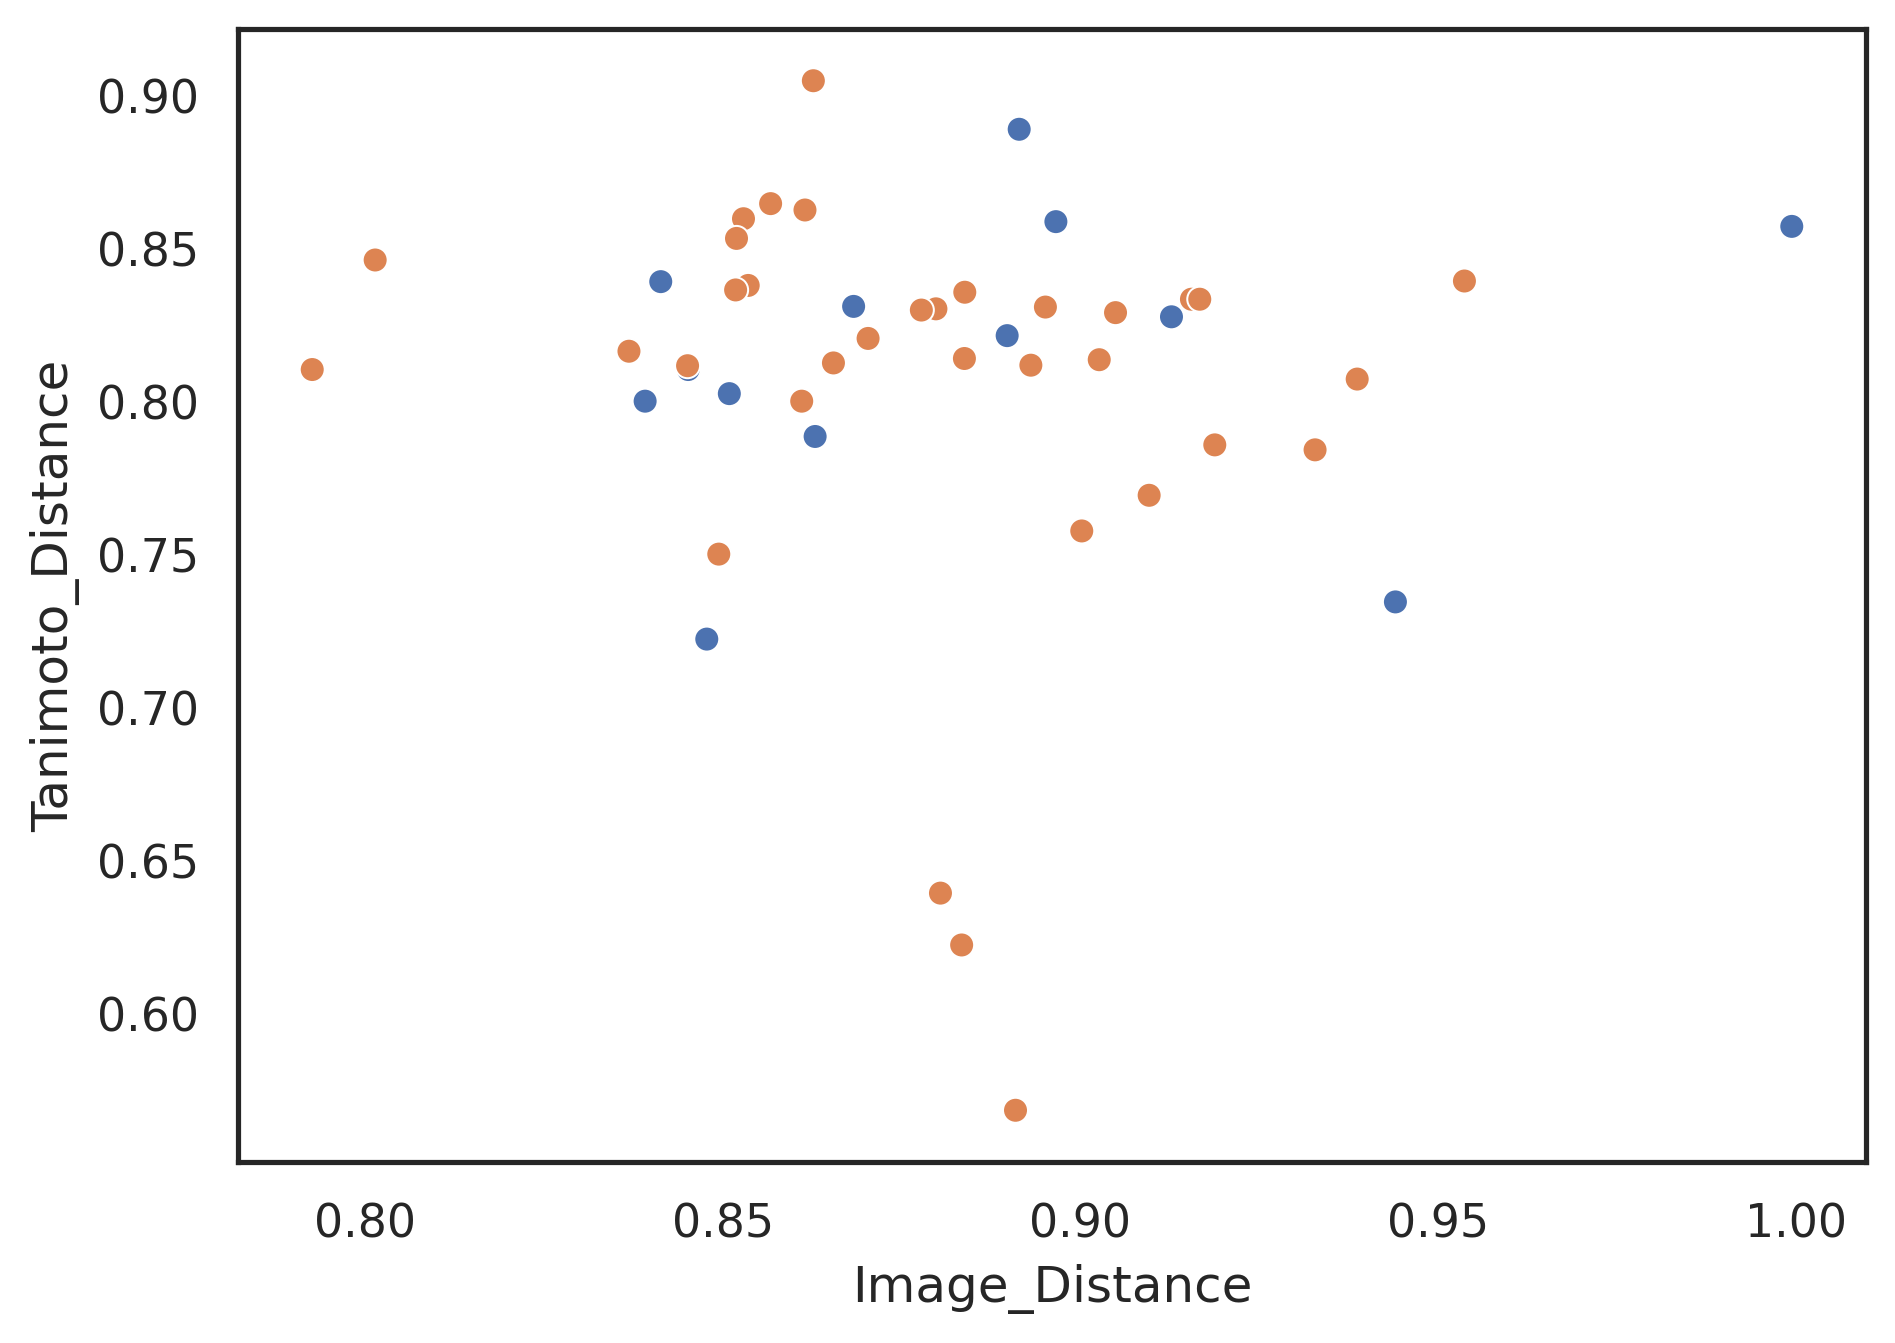

In [30]:
sns.set(rc={'figure.figsize':(7, 5)})
plt.rcParams['figure.dpi'] = 300
sns.set_style("white")
sns.scatterplot(data=results[results["Activity"]==1], x="Image_Distance", y="Tanimoto_Distance", hue="CP_Correct?", legend=False)

<AxesSubplot:xlabel='Image_Distance', ylabel='Tanimoto_Distance'>

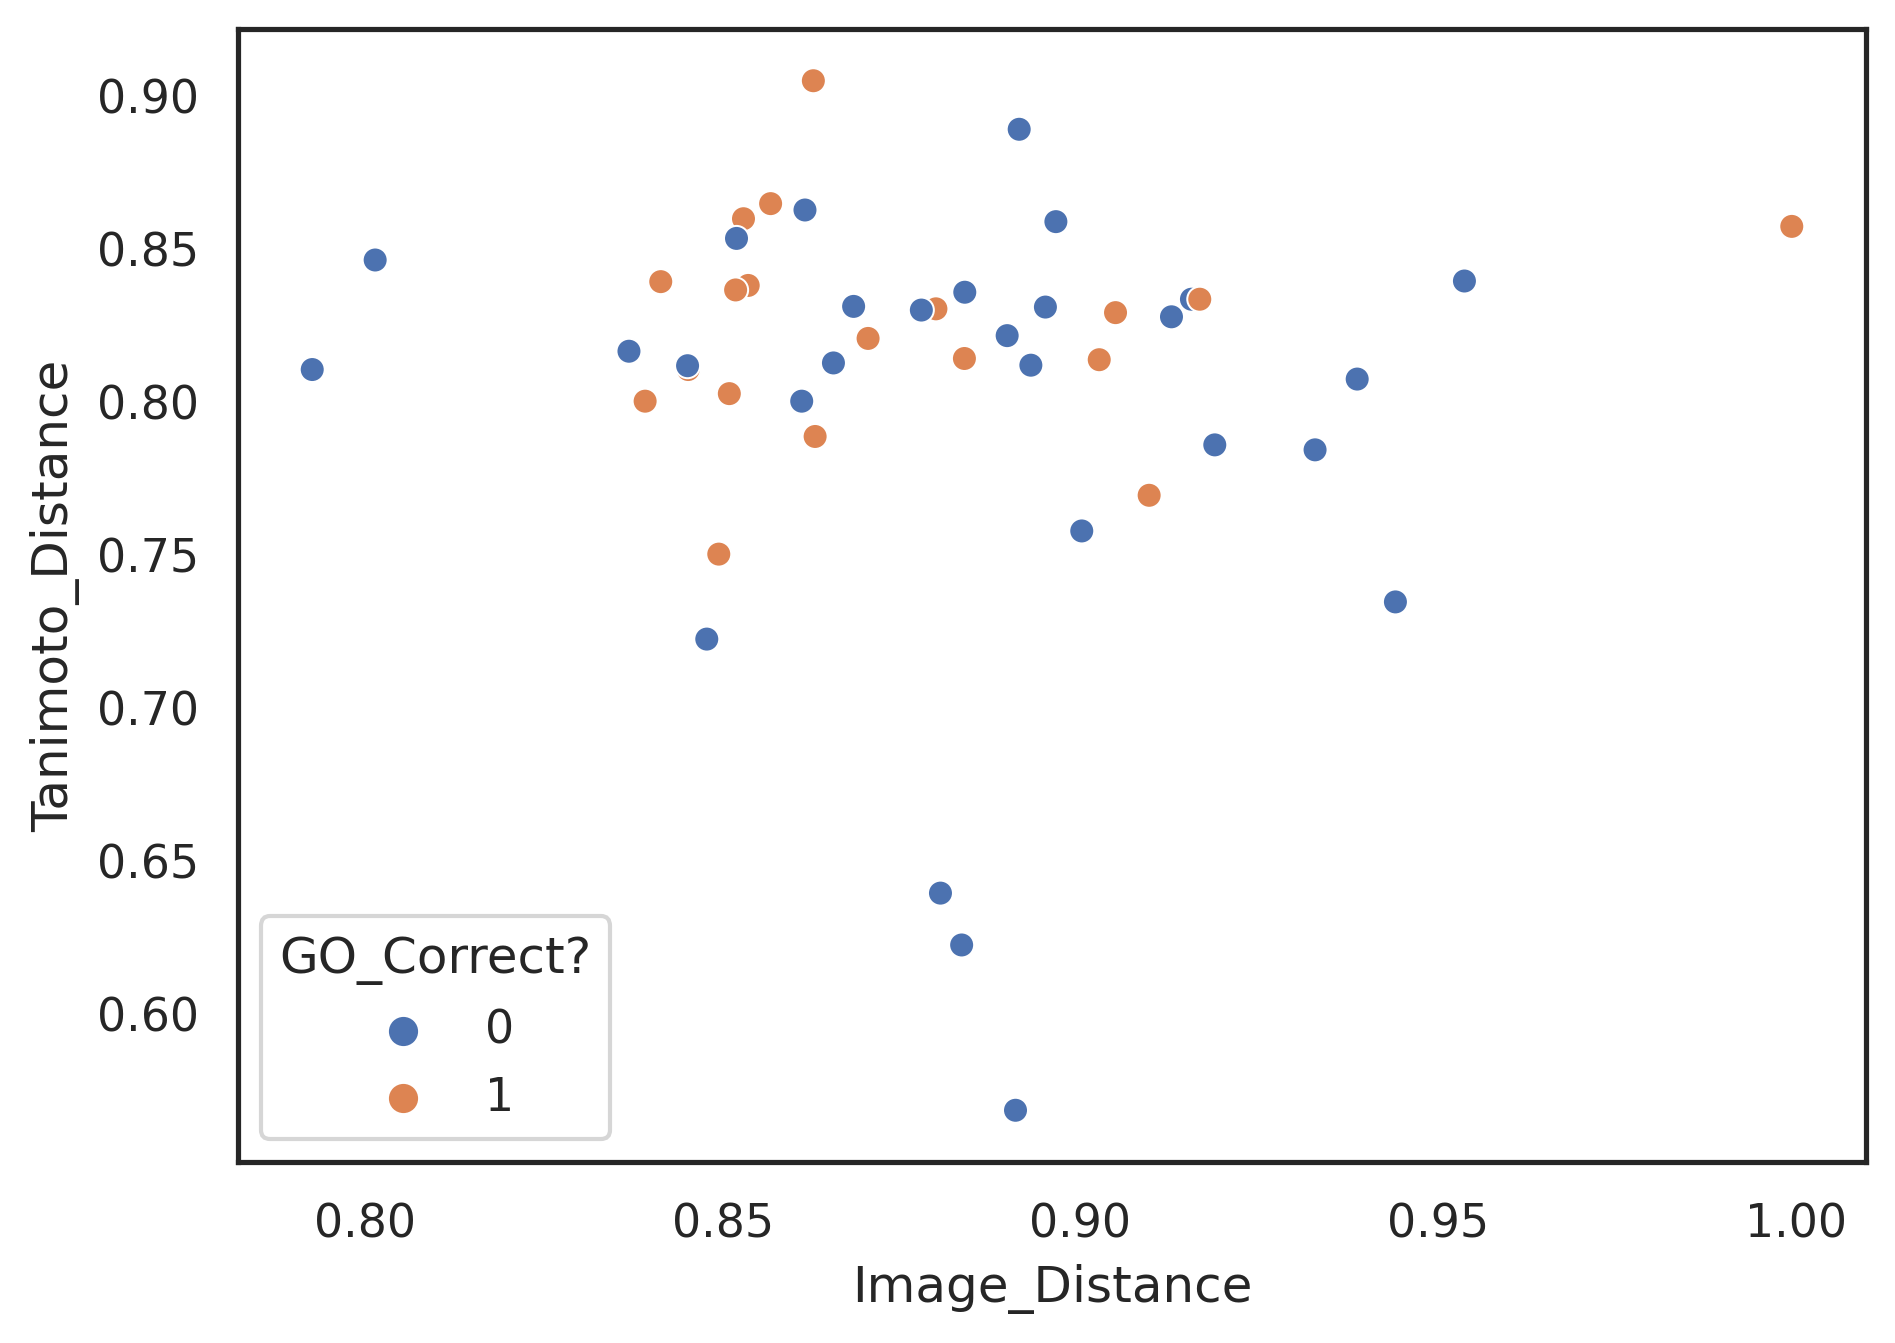

In [31]:
sns.scatterplot(data=results[results["Activity"]==1],  x="Image_Distance", y="Tanimoto_Distance",hue="GO_Correct?")

<AxesSubplot:xlabel='Image_Distance', ylabel='Tanimoto_Distance'>

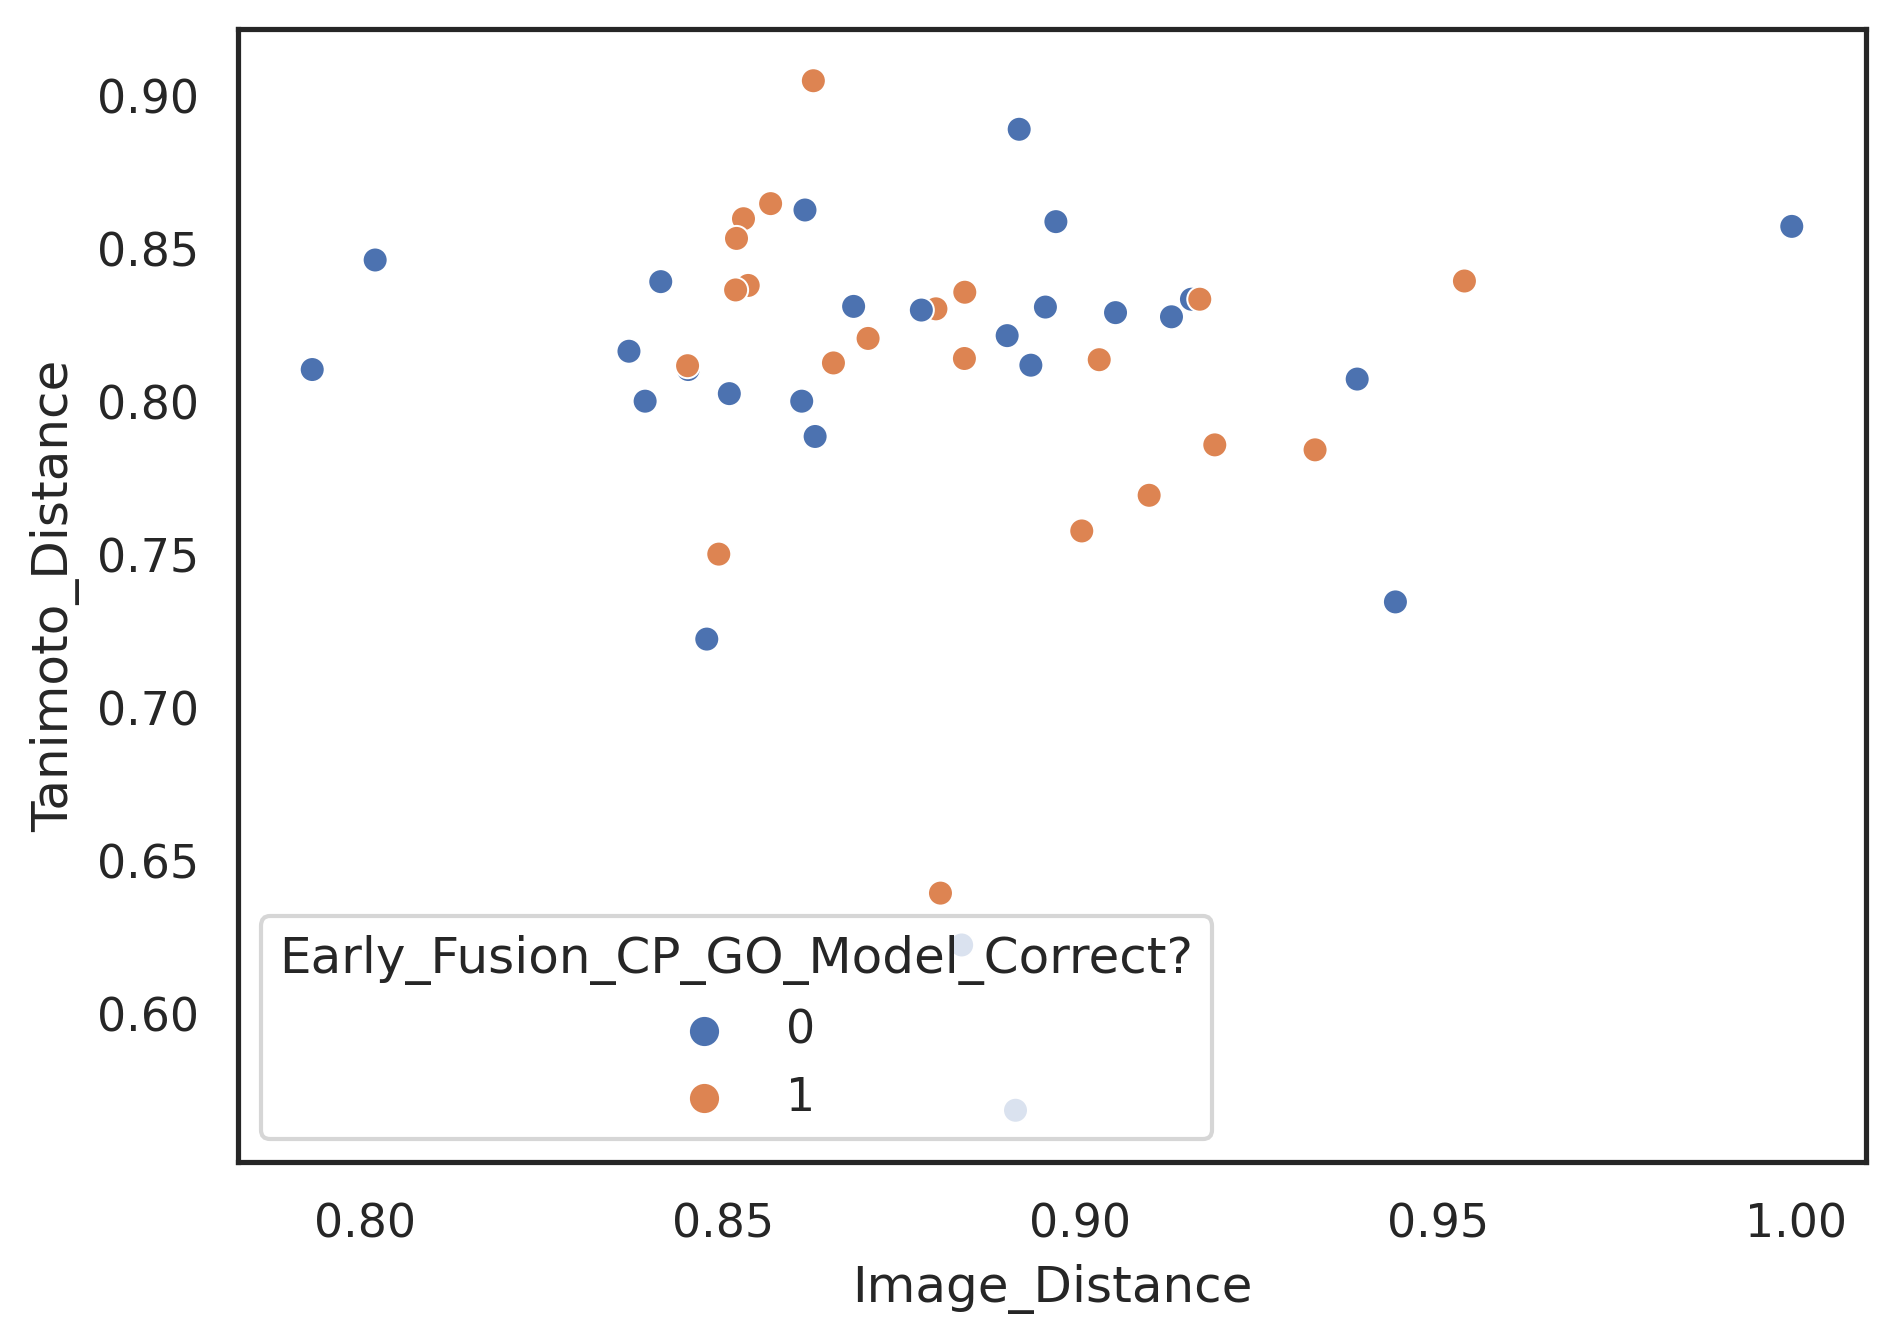

In [32]:
sns.scatterplot(data=results[results["Activity"]==1], x="Image_Distance", y="Tanimoto_Distance", hue="Early_Fusion_CP_GO_Model_Correct?")

<AxesSubplot:xlabel='Image_Distance', ylabel='Tanimoto_Distance'>

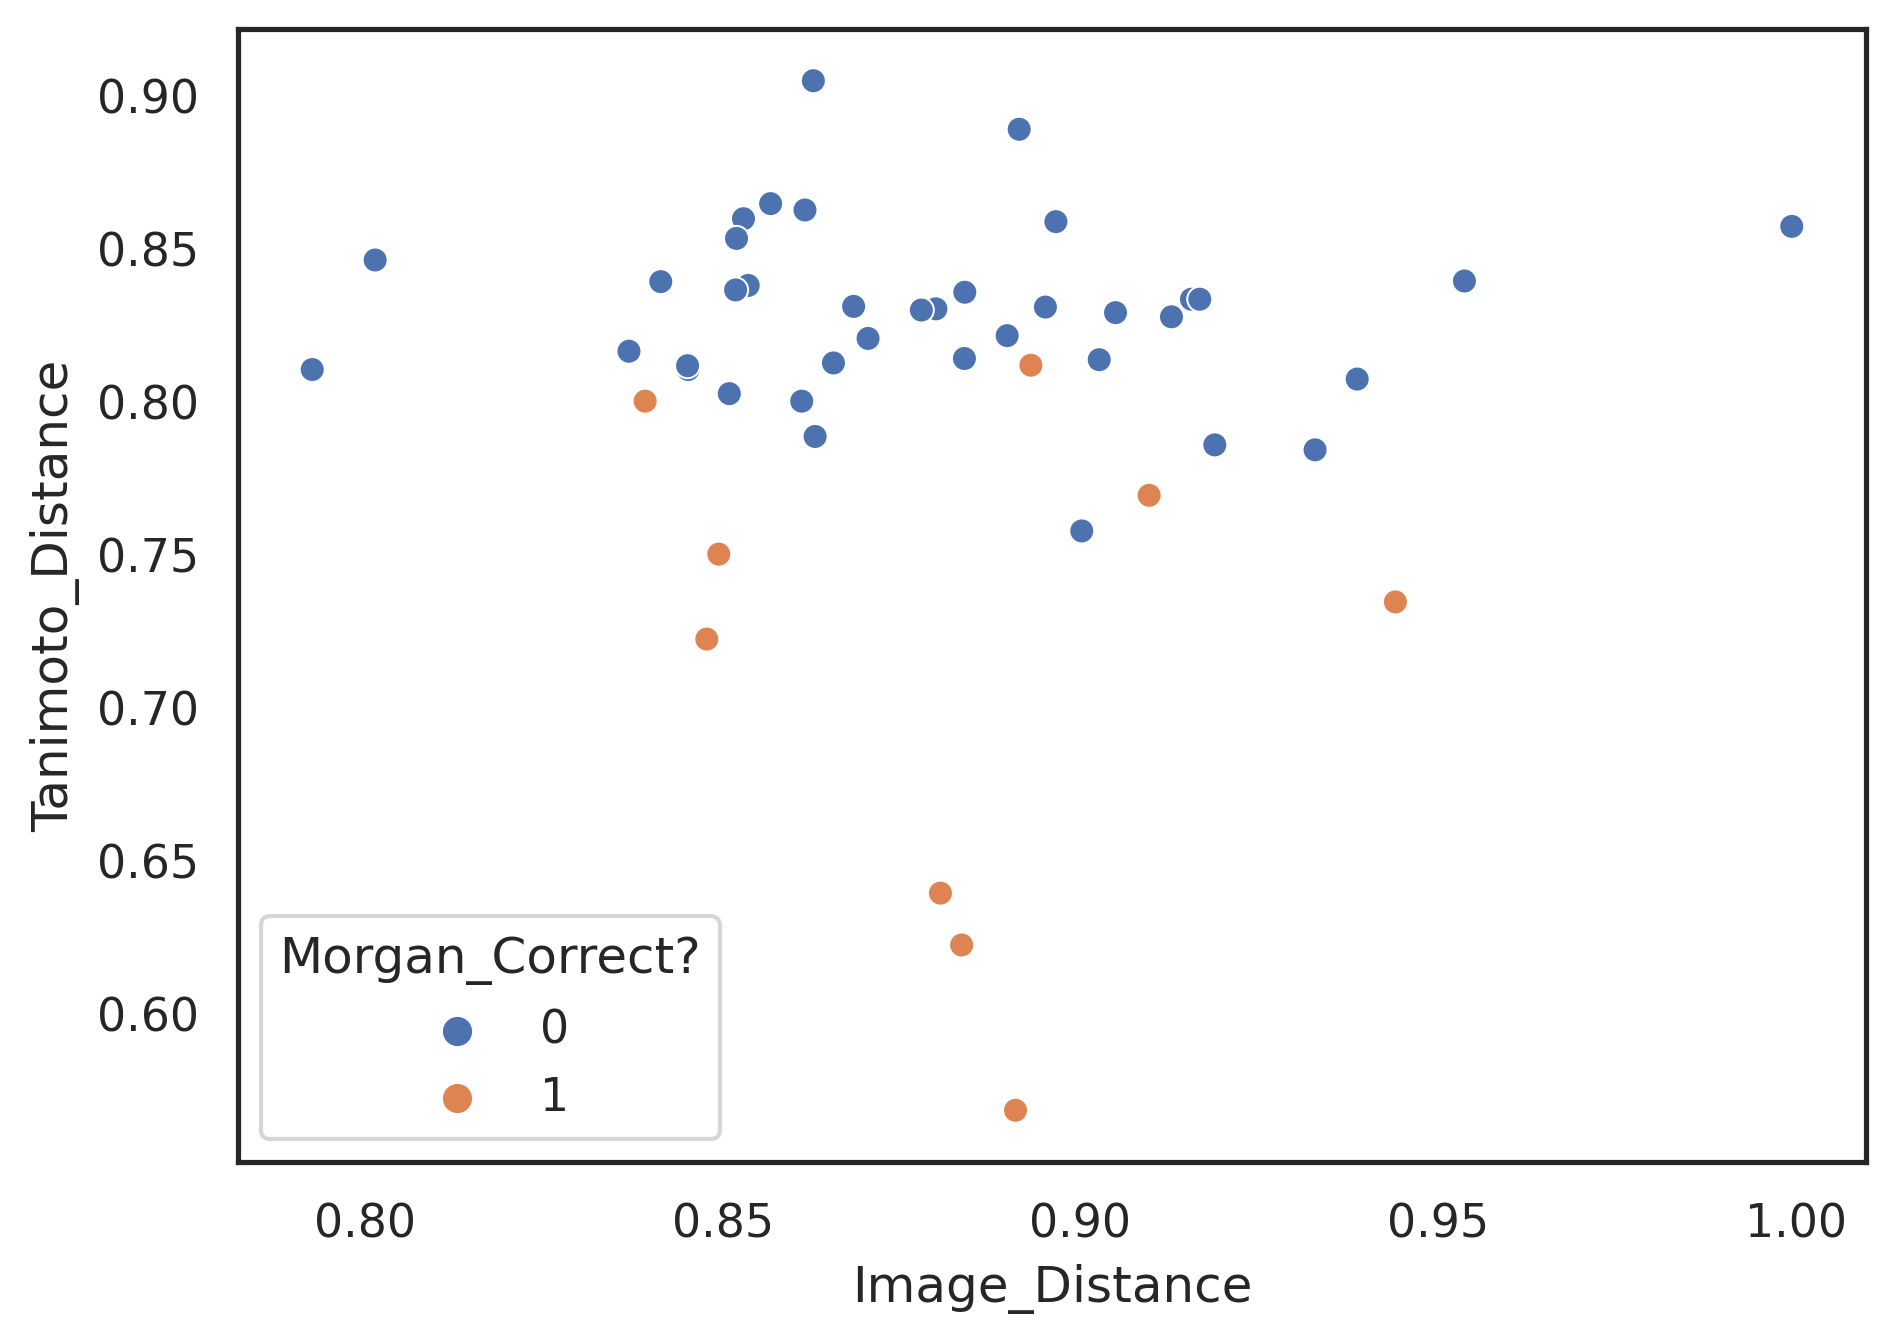

In [33]:
sns.scatterplot(data=results[results["Activity"]==1], x="Image_Distance", y="Tanimoto_Distance", hue="Morgan_Correct?")

<AxesSubplot:xlabel='Image_Distance', ylabel='Tanimoto_Distance'>

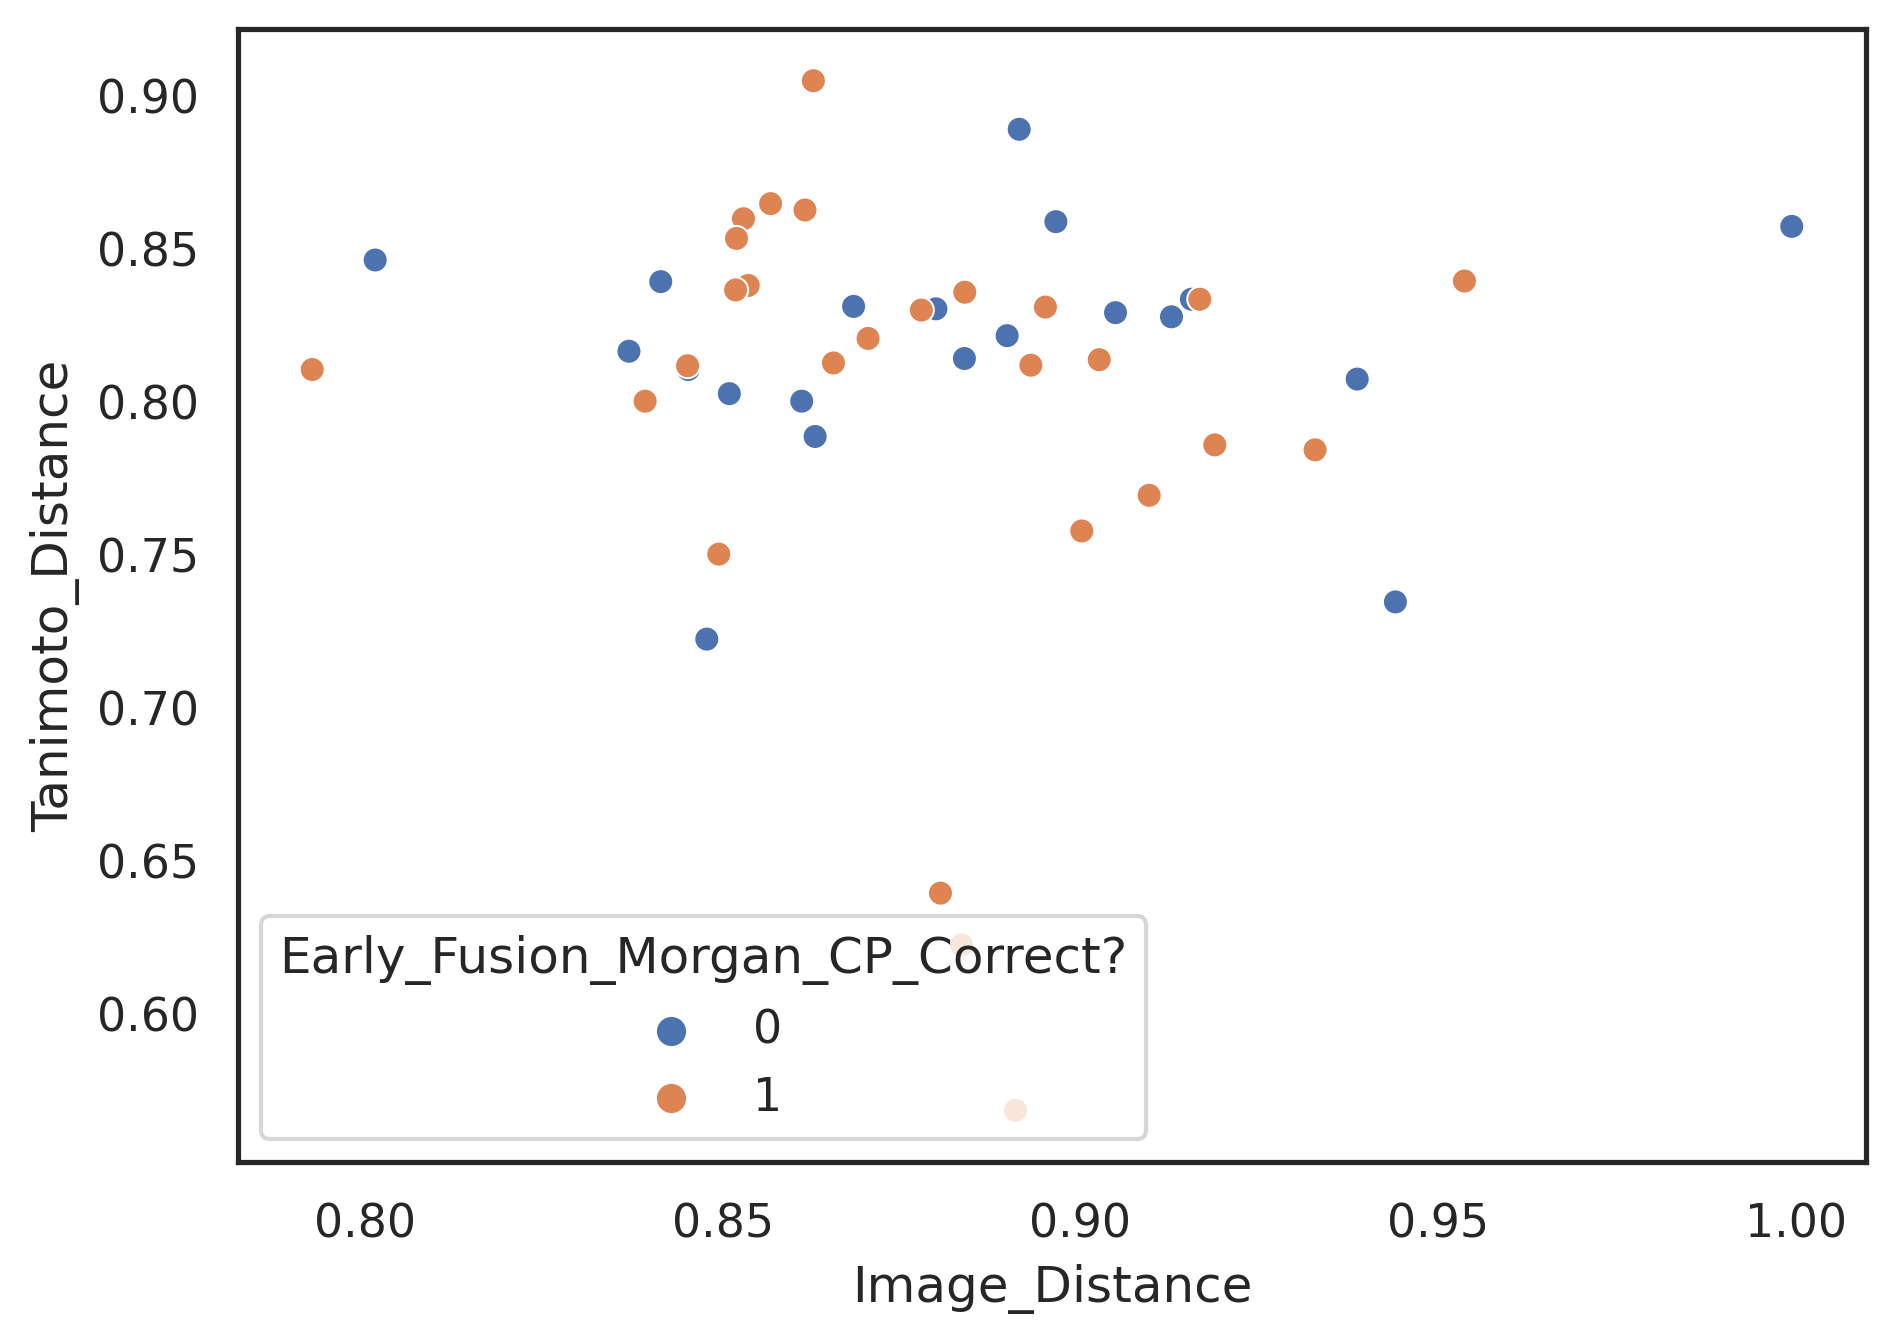

In [34]:
sns.scatterplot(data=results[results["Activity"]==1],  x="Image_Distance", y="Tanimoto_Distance", hue="Early_Fusion_Morgan_CP_Correct?")

<AxesSubplot:xlabel='Image_Distance', ylabel='Tanimoto_Distance'>

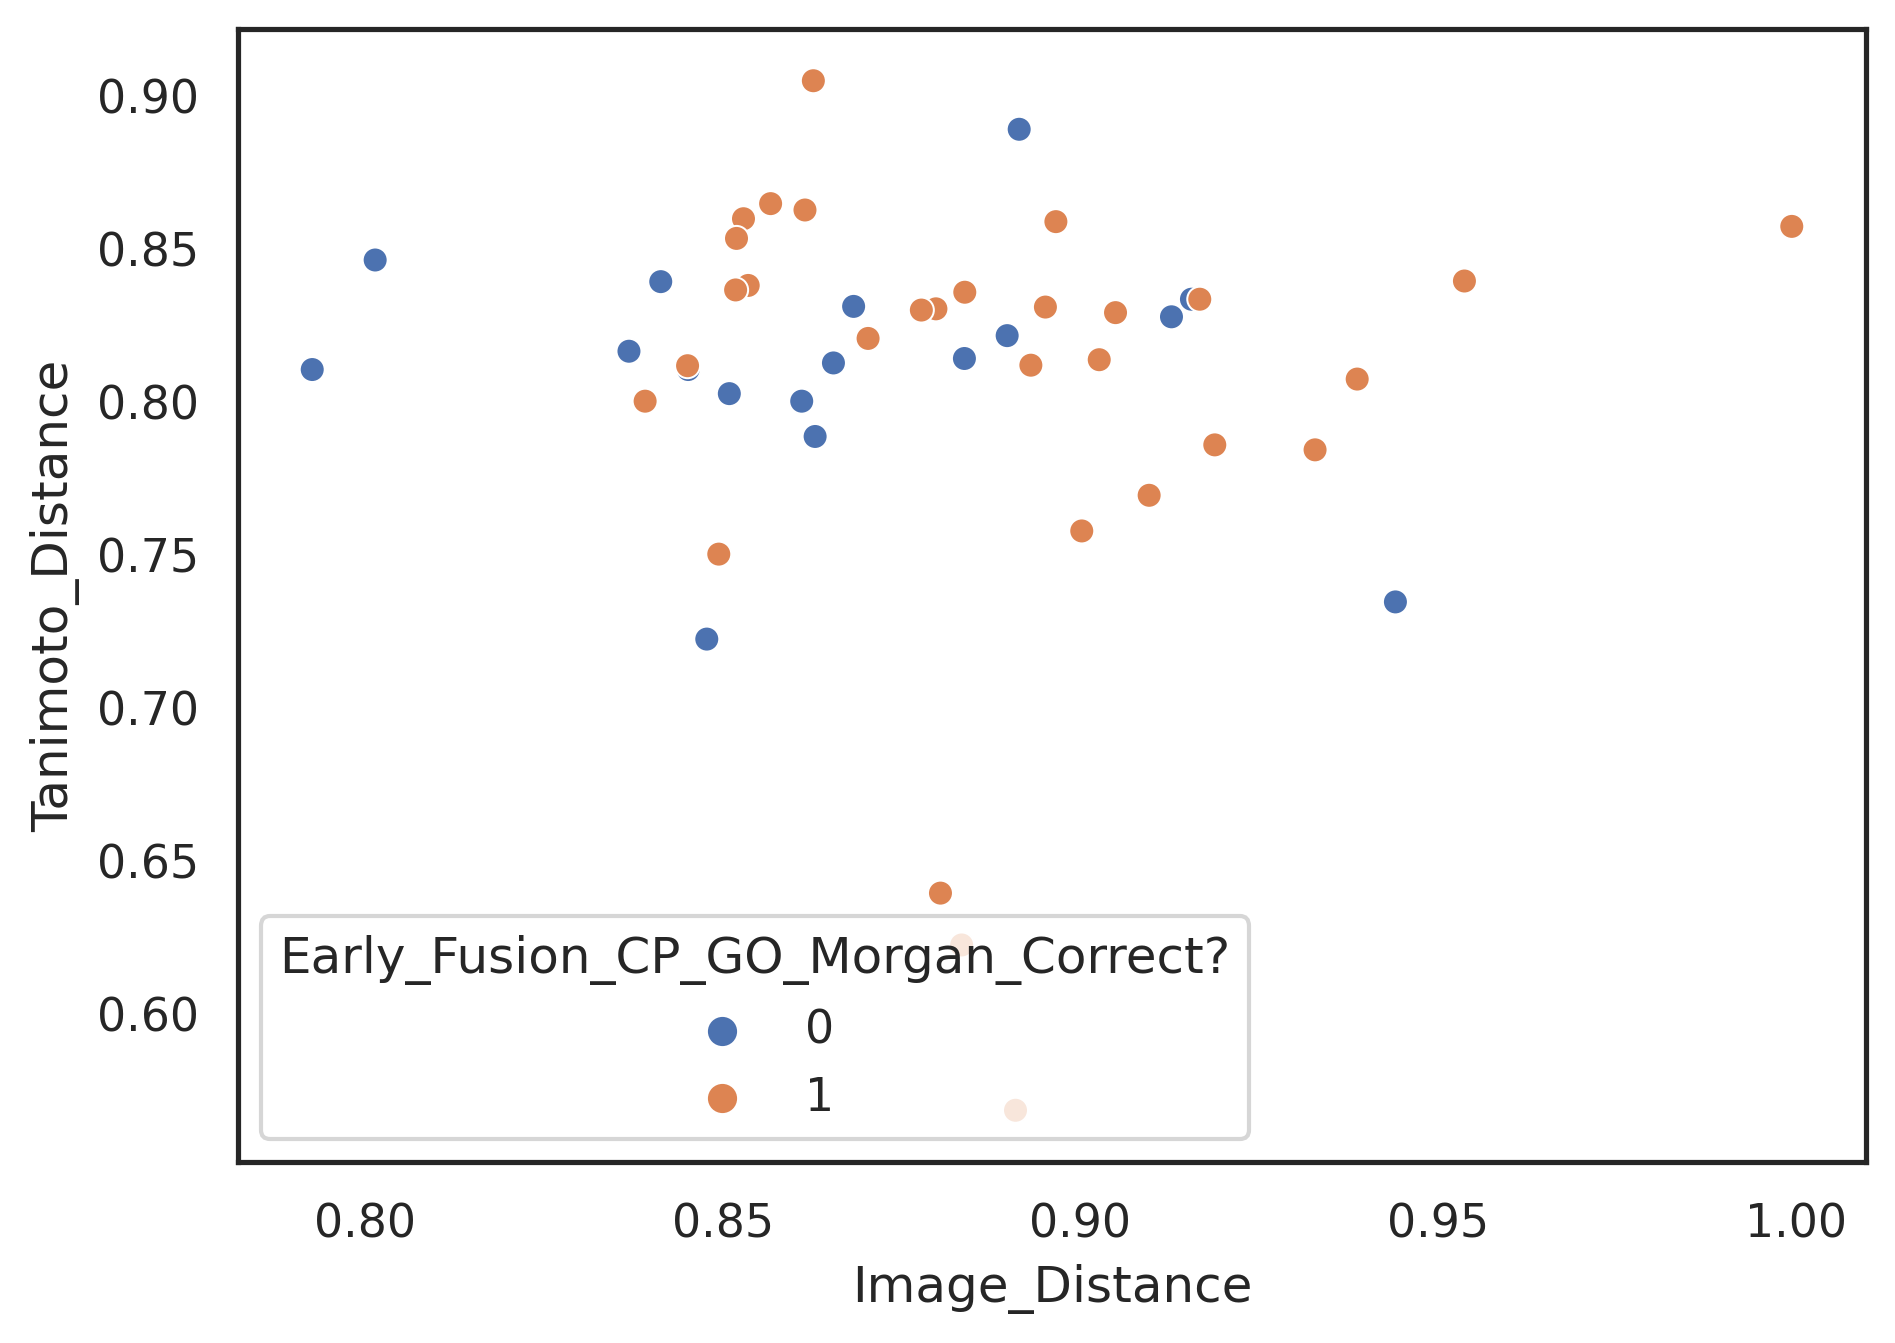

In [35]:
sns.scatterplot(data=results[results["Activity"]==1],  x="Image_Distance", y="Tanimoto_Distance", hue="Early_Fusion_CP_GO_Morgan_Correct?")

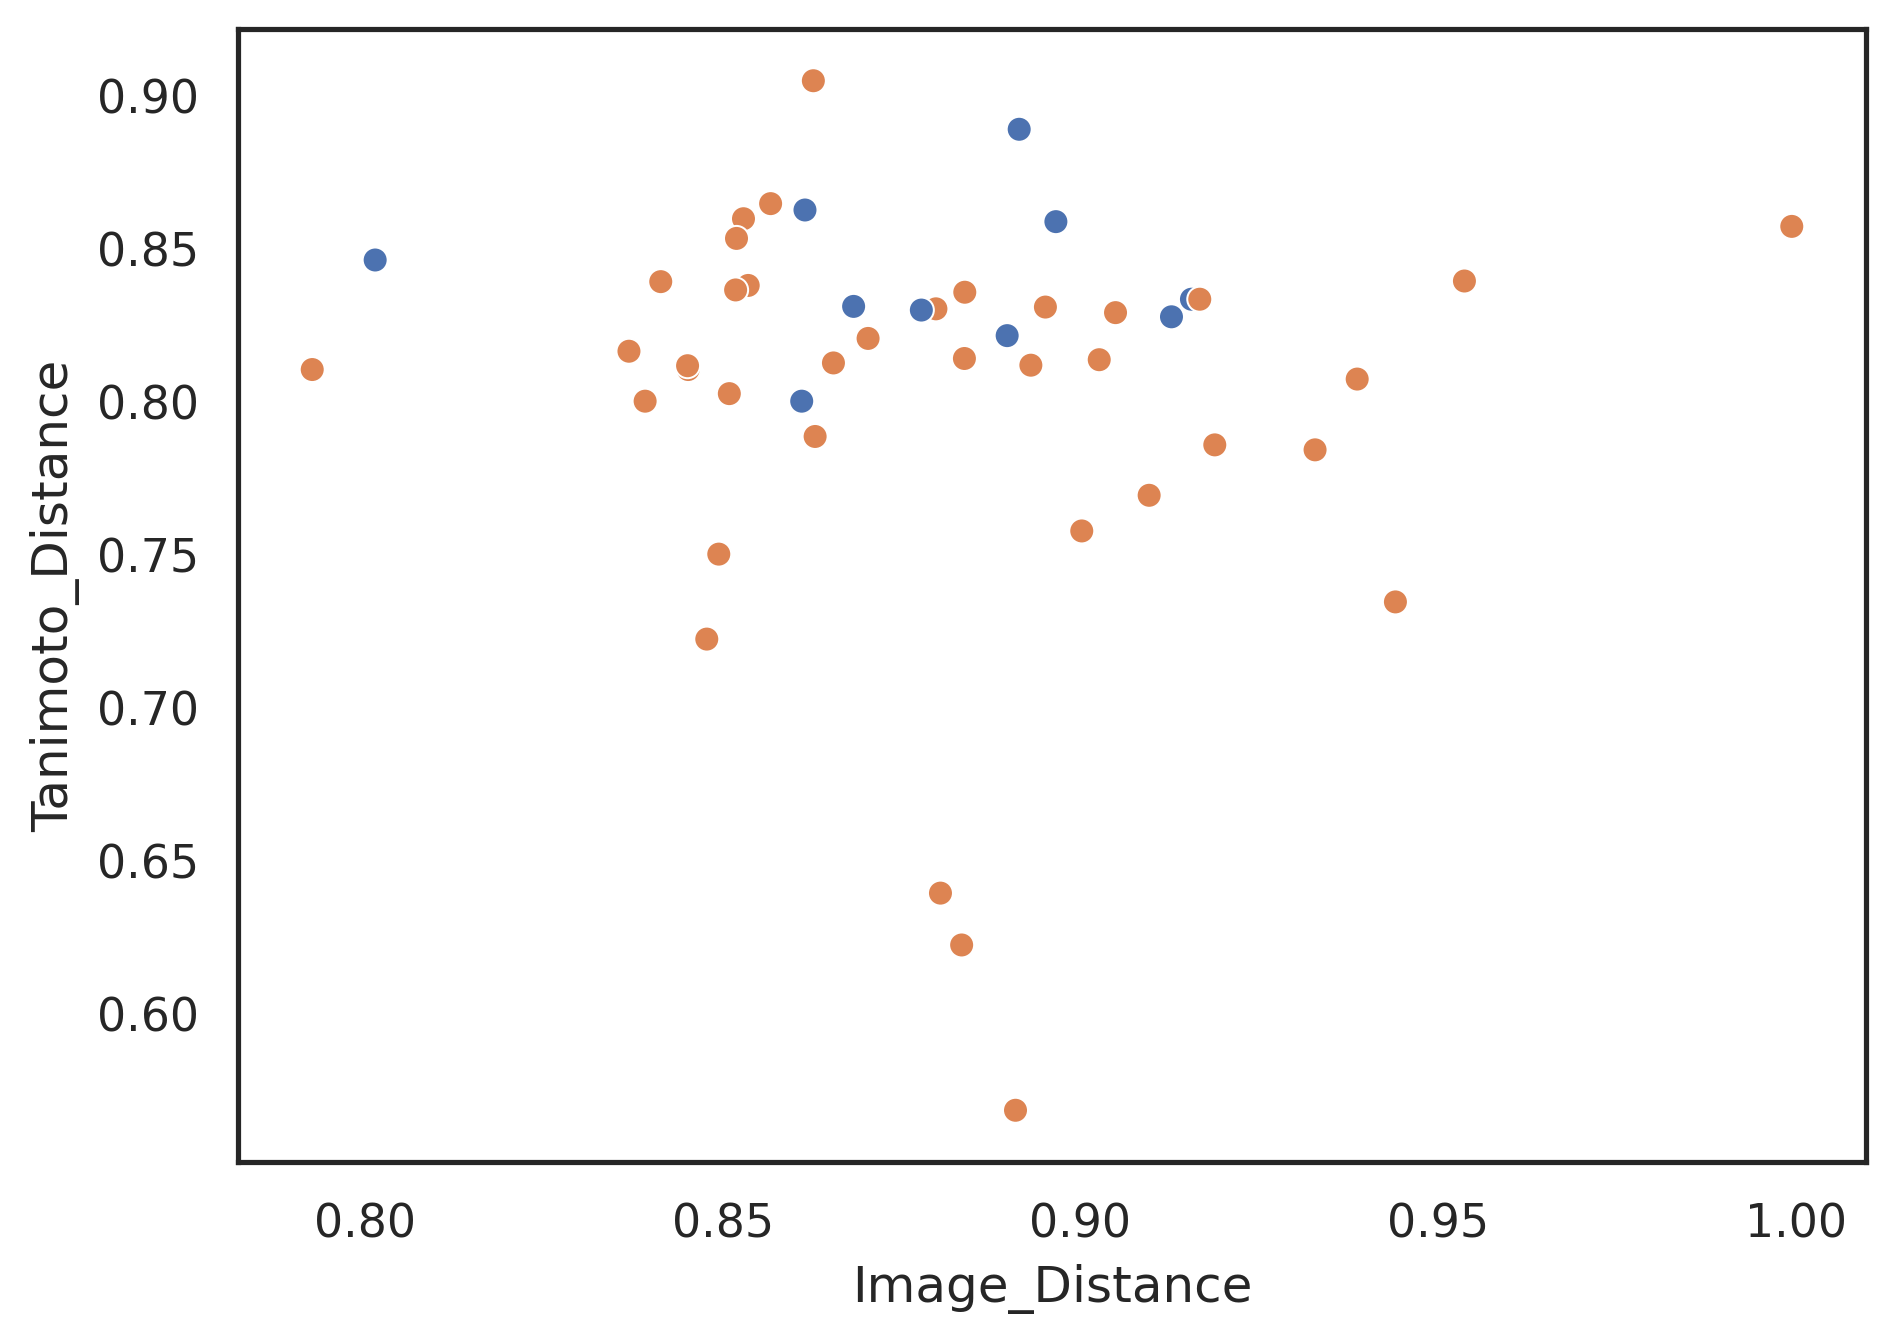

In [36]:
g=sns.scatterplot(data=results[results["Activity"]==1],  x="Image_Distance", y="Tanimoto_Distance", hue="Late_Stage_Fusion_CP_GO_Morgan_Correct?")
g.legend_.remove()